# **Regresión Lineal**


La regresión lineal es una técnica estadística utilizada para modelar la relación entre una variable dependiente (o respuesta) y una o más variables independientes (o predictores). Se utiliza comúnmente para comprender cómo cambia la variable dependiente cuando se modifican las variables independientes.

Cuando se aplica a un análisis de correlación y predicción de resultados, la regresión lineal se utiliza para:

1. **Análisis de correlación:** La regresión lineal puede ayudar a determinar si existe una relación lineal entre dos variables. La fuerza y la dirección de esta relación se pueden evaluar utilizando el coeficiente de correlación (como el coeficiente de correlación de Pearson). Si el coeficiente de correlación es cercano a 1 o -1, indica una relación fuerte, positiva o negativa, respectivamente, entre las variables.

2. **Predicción de resultados:** Una vez establecida una relación lineal entre las variables, se puede utilizar la regresión lineal para predecir el valor de la variable dependiente dados los valores de las variables independientes. El modelo de regresión lineal encuentra la "línea de mejor ajuste" que minimiza la suma de los errores cuadráticos entre los valores observados y los valores predichos. Esta línea se utiliza luego para hacer predicciones sobre nuevos datos.

En resumen, la regresión lineal permite tanto explorar la relación entre variables como hacer predicciones sobre futuros resultados en función de estas relaciones. Sin embargo, es importante tener en cuenta las suposiciones subyacentes de la regresión lineal, como la linealidad, la independencia de los errores y la normalidad de los residuos, para interpretar adecuadamente los resultados y las predicciones del modelo.

## **1. Conociendo el Dataset**

### 1.1.Importando bibliotecas


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

# Ignorar las advertencias para una salida más limpia
warnings.filterwarnings('ignore')  # warnings.filterwarnings(action='once')

### 1.2 El Dataset y el Proyecto

* Fuente: https://www.kaggle.com/dongeorge/beer-consumption-sao-paulo

**Descripción:** La cerveza es una de las bebidas más democráticas y consumidas del mundo. No sin razón, es perfecta para casi todas las situaciones, desde el happy hour hasta las grandes fiestas de bodas.

El objetivo de este proyecto es estimar un modelo de <b>Machine Learning</b> utilizando la técnica de <b>Regresión Lineal</b> para demostrar los impactos de las variables disponibles en este dataset sobre el consumo de cerveza (Y). Al final del proyecto, tendremos un modelo de predicción para el consumo medio de cerveza según los inputs de un conjunto de variables (X's).</p>


Los datos (muestra) fueron recolectados en São Paulo - Brasil, en un área universitaria, donde hay algunas fiestas con grupos de estudiantes de 18 a 28 años (en media).</p>

**Datos:**
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>fecha</b> - Fecha</li>
    <li><b>temp_media</b> - Temperatura Media (°C)</li>
    <li><b>temp_min</b> - Temperatura Mínima (°C)</li>
    <li><b>temp_max</b> - Temperatura Máxima (°C)</li>
    <li><b>lluvia</b> - Precipitación (mm)</li>
    <li><b>fds</b> - Fin de Semana (1 = Sí; 0 = No)</li>
    <li><b>consumo</b> - Consumo de Cerveza (litros)</li>
</ul>

* Lectura de los datos

In [ ]:
datos= pd.read_csv('Consumo_cerveza.csv',sep=';')

* Ver los datos

In [ ]:
datos.head()

,fecha,temp_media,temp_min,temp_max,lluvia,fds,consumo
0,01/01/2015,27.30,23.9,32.5,0.0,0,25461
1,02/01/2015,27.02,24.5,33.5,0.0,0,28972
2,03/01/2015,24.82,22.4,29.9,0.0,1,30814
3,04/01/2015,23.98,21.5,28.6,1.2,1,29799
4,05/01/2015,23.82,21.0,28.3,0.0,0,28900


* Verificando el tamaño del dataset

In [ ]:
datos.shape

(365, 7)

### 1.3 Analisis preliminar

* Estadísticos descriptivos

In [ ]:
datos.describe().round(2)

,temp_media,temp_min,temp_max,lluvia,fds,consumo
count,365.00,365.00,365.00,365.00,365.00,365.00
mean,21.23,17.46,26.61,5.20,0.28,25401.37
std,3.18,2.83,4.32,12.42,0.45,4399.14
min,12.90,10.60,14.50,0.00,0.00,14343.00
25%,19.02,15.30,23.80,0.00,0.00,22008.00
50%,21.38,17.90,26.90,0.00,0.00,24867.00
75%,23.28,19.60,29.40,3.20,1.00,28631.00
max,28.86,24.50,36.50,94.80,1.00,37937.00


Tenemos el recuento de las variables 365.000 para todos, la media aritmética mean, la desviación estándar, el valor mínimo de las variables, el 25% se refiere al primer cuartil de las variables, el 50% es la mediana, el 75% es el tercer cuartil y por último tenemos el valor máximo.

**Matriz de correlación**

El <b> coeficiente de correlación </b> es una medida de asociación lineal entre dos variables y su valor está entre <b> -1 </b> y <b> +1 </b>, dónde <b> - 1 </b> indica asociación negativa perfecta y <b> +1 </b> indica asociación positiva perfecta.</p>

In [ ]:
datos.corr().round(4)

,temp_media,temp_min,temp_max,lluvia,fds,consumo
temp_media,1.0000,0.8628,0.9225,0.0244,-0.0508,0.5746
temp_min,0.8628,1.0000,0.6729,0.0986,-0.0595,0.3925
temp_max,0.9225,0.6729,1.0000,-0.0493,-0.0403,0.6427
lluvia,0.0244,0.0986,-0.0493,1.0000,0.0016,-0.1938
fds,-0.0508,-0.0595,-0.0403,0.0016,1.0000,0.5060
consumo,0.5746,0.3925,0.6427,-0.1938,0.5060,1.0000



Esta matriz de correlación muestra las correlaciones entre las variables en tu conjunto de datos. Cada valor en la matriz representa el coeficiente de correlación entre dos variables. Aquí está el significado de los valores:

Los valores de correlación oscilan entre -1 y 1, donde:

* **1:** Indica una correlación positiva perfecta, lo que significa que las variables tienden a aumentar juntas.
* **-1:** Indica una correlación negativa perfecta, lo que significa que las variables tienden a disminuir juntas.
* **0:** Indica que no hay correlación lineal entre las variables.

Por ejemplo:

* La temperatura media tiene una fuerte correlación positiva con la temperatura mínima y máxima.
* La cantidad de lluvia tiene una correlación negativa moderada con el consumo de cerveza.
* El consumo de cerveza tiene una correlación positiva moderada con la temperatura media y máxima, así como con los días de fin de semana.

Estas correlaciones proporcionan información sobre cómo las variables están relacionadas entre sí en tu conjunto de datos.

Aquí vamos a seleccionar la temperatura máxima, la cantidad de lluvia y los días de fin de semana como variables explicativas para nuestro modelo. ¿Por qué no vamos a utilizar la temperatura media y la temperatura mínima, que muestran una correlación más fuerte que la lluvia, por ejemplo?

La primera razón es que la temperatura máxima presenta una correlación más robusta que la temperatura media y mínima. Además, si observamos la correlación entre la temperatura media y mínima, notamos una alta correlación del 0.86%. Tener una correlación fuerte entre dos variables explicativas no es ideal para un modelo de regresión lineal, ya que puede generar problemas de estimación significativos.

Debemos evitar este tipo de problemas. Lo mismo sucede con la relación entre la temperatura media y la temperatura máxima, que casi alcanza una correlación de 1. También ocurre entre la temperatura mínima y la temperatura máxima, con una correlación sólida del 67%. Por lo tanto, optaremos por no utilizar las variables de temperatura media y mínima en nuestro modelo, dado que estas muestran una correlación fuerte entre sí y con la otra variable explicativa, la temperatura máxima.

## **2. Comportamiento de la variable dependiente (Y)**

El comportamiento de la variable dependiente (Y) es fundamental para comprender cómo se relaciona con las variables independientes en nuestro modelo. En el contexto de un análisis de regresión, la variable dependiente representa la respuesta que estamos tratando de predecir o explicar.

Para comprender el comportamiento de la variable dependiente, es importante examinar su distribución y entender cómo varía en relación con las variables independientes. Esto puede implicar la realización de gráficos de dispersión para visualizar la relación entre la variable dependiente y cada variable independiente por separado, así como también el uso de gráficos de línea o de barras para explorar cómo cambia la variable dependiente en función de diferentes niveles de las variables independientes.

Además, es útil calcular estadísticas descriptivas como la media, la mediana, la desviación estándar y los cuartiles para tener una idea de la distribución y la dispersión de la variable dependiente.

### 2.1 Grafico de Lineas

* Grafico de Lineas

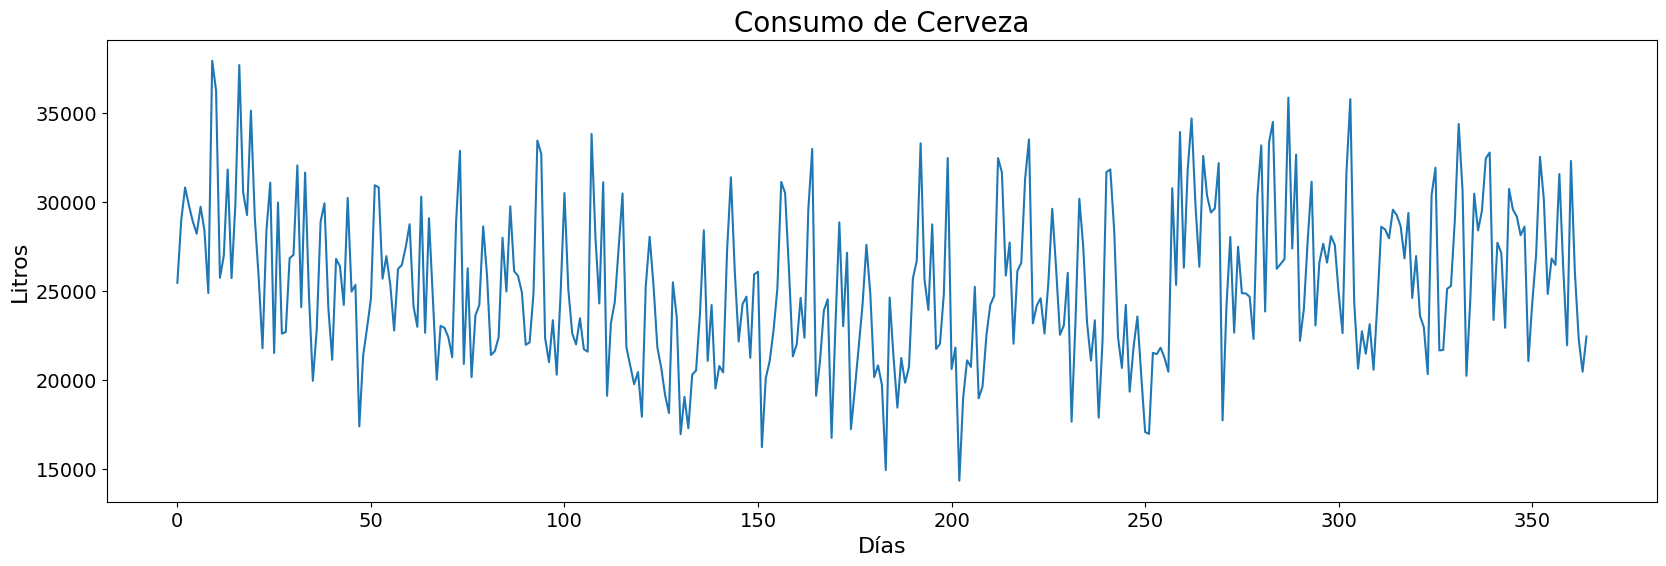

In [ ]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(20, 6))

# Graficar el consumo de cerveza en función de los días
ax = datos['consumo'].plot(fontsize=14)

# Establecer el título del gráfico
ax.set_title('Consumo de Cerveza', fontsize=20)

# Establecer etiquetas para los ejes y la fuente
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Días', fontsize=16)

# Mostrar el gráfico
plt.show()

Y aquí tenemos la evolución del consumo a lo largo del año 2015.

El objetivo ahora es ver si la variable consumo no presenta ningún cambio estructural. Por ejemplo, aquí podemos ver que de enero hasta la mitad del año hay un lento descenso del consumo y después vuelve a subir hasta diciembre, lo que podría ser explicado por la temperatura.

En meses más fríos el consumo tiende a caer, lo que no queremos ver es una caída o subida muy repentina y larga como estos dos gráficos.

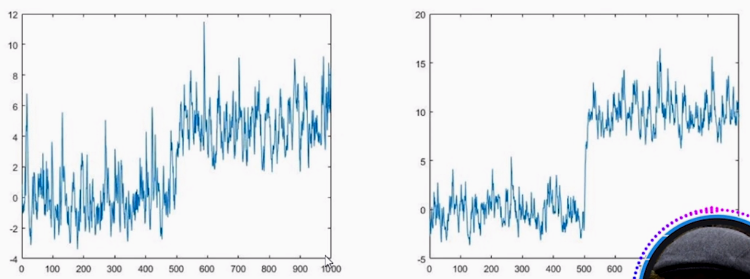

Estos cambios repentinos es lo que llamamos **cambio estructural**, donde después del cambio, la variable cambia de nivel.

Estos cambios son difíciles de modelar y requiere que usemos modelos más avanzados de regresión. Aparte de estos cambios estructurales, también no queremos que la serie presente un comportamiento de un random walk, como podemos ver estos gráficos.

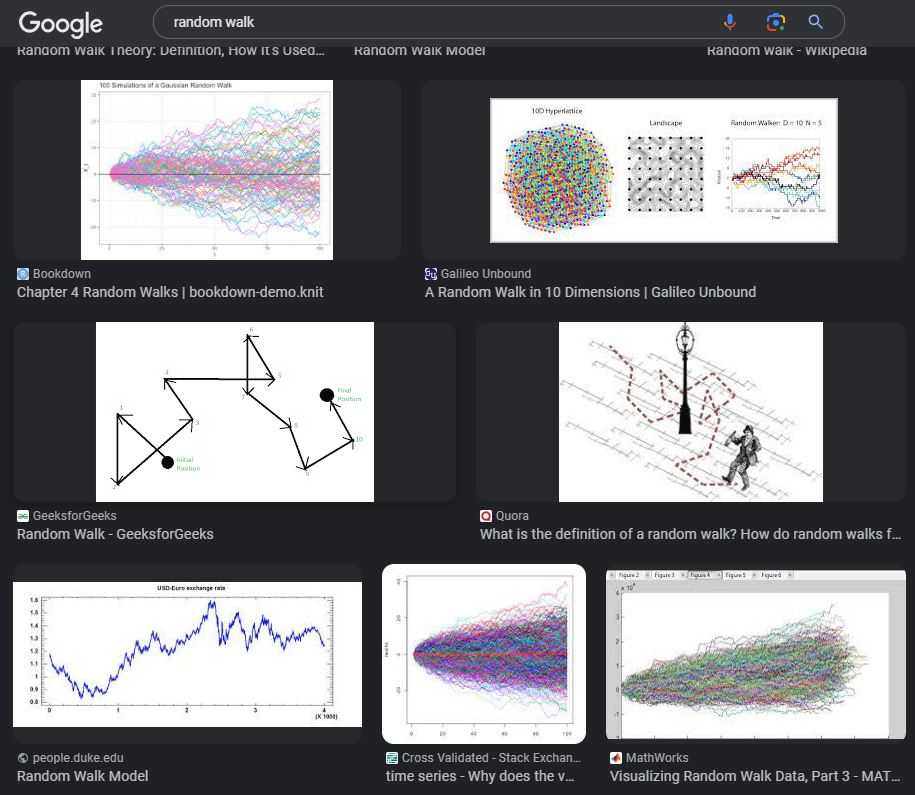

 Random walk son series temporales que presentan largas desviaciones de su promedio, sin tendencia a revertir su promedio. En suma, lo que queremos ver específicamente en una serie temporal para que podamos usar el modelo de regresión lineal es que la serie varía alrededor de su media sin mostrar desviaciones largas o sistemáticas de su media.

Eso es lo que llamamos serie estacionaria. Así queremos que nuestra variable muestre un comportamiento típico de serie estacionaria. Para verlo mejor, podemos introducir una línea que representa el promedio de la variable.

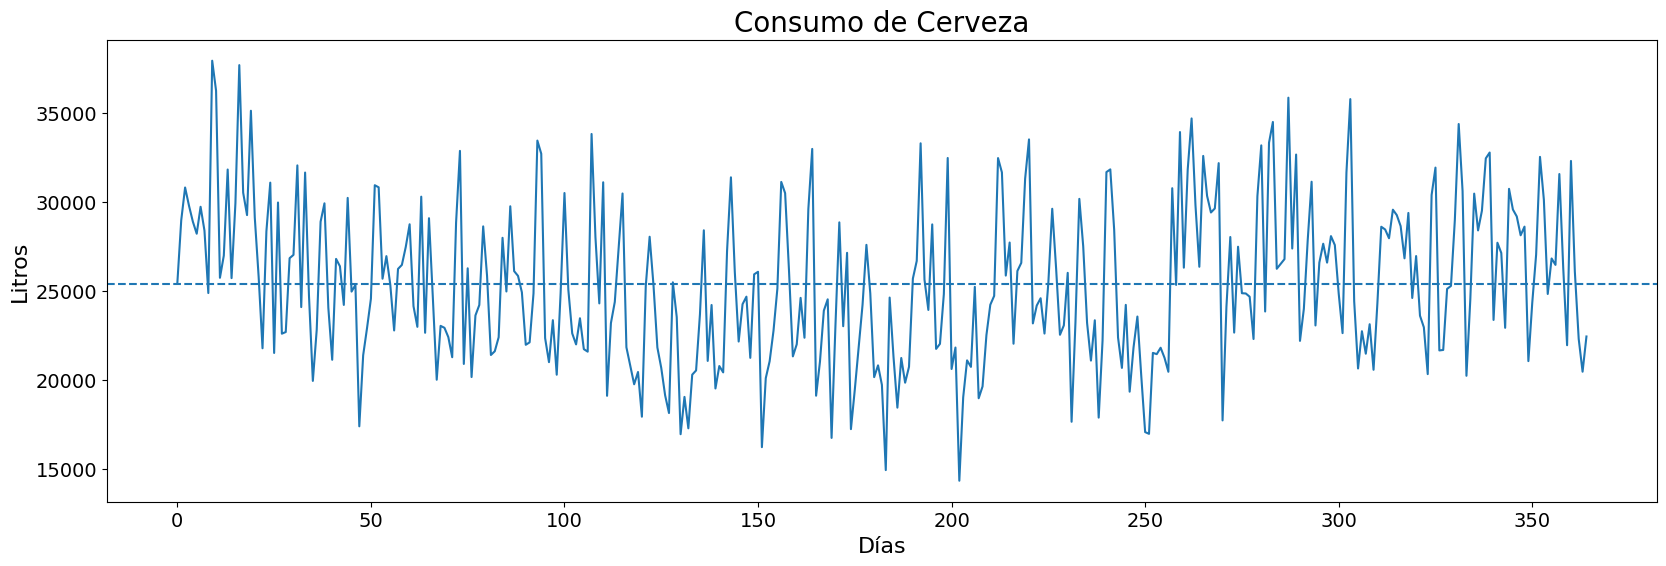

In [ ]:
# Crear una figura y un conjunto de ejes
fig, ax = plt.subplots(figsize=(20, 6))

# Graficar el consumo de cerveza en función de los días
ax = datos['consumo'].plot(fontsize=14)

# Agregar una línea horizontal en la media del consumo de cerveza
ax.axhline(y=np.mean(datos['consumo']), ls='--')

# Establecer el título del gráfico
ax.set_title('Consumo de Cerveza', fontsize=20)

# Establecer etiquetas para los ejes y la fuente
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Días', fontsize=16)

# Mostrar el gráfico
plt.show()

Como podemos ver, el consumo no presenta desviaciones largas o sistemáticas de su medio, así que se parece a una serie estacionaria, asi podemos seguir con nuestro proyecto.

### 2.2 Box Plot (Diagrama de caja)

Un diagrama de caja, comúnmente conocido como boxplot en inglés, es una representación gráfica que se utiliza para visualizar la distribución de un conjunto de datos y para identificar de manera visual la presencia de valores atípicos. Este tipo de gráfico proporciona información sobre la dispersión y la simetría de los datos.

Un boxplot consiste en un rectángulo que se extiende desde el primer cuartil (Q1) hasta el tercer cuartil (Q3) del conjunto de datos, con una línea en el interior que representa la mediana. Los "bigotes" del diagrama de caja se extienden desde los bordes del rectángulo hasta los valores extremos que no se consideran valores atípicos. Los valores atípicos, si los hay, se muestran como puntos individuales más allá de los bigotes.

El boxplot es una herramienta útil para comparar la distribución de diferentes conjuntos de datos y para identificar patrones o discrepancias en los datos. Además, proporciona una forma eficaz de visualizar la dispersión y la centralidad de los datos de manera concisa y clara.

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

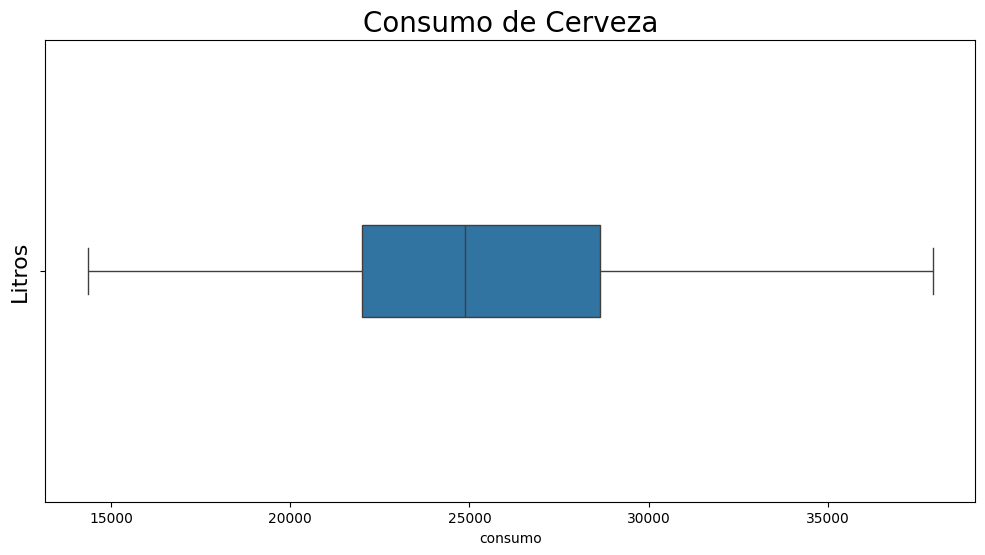

In [ ]:
ax=sns.boxplot(data=datos['consumo'],orient='h',width=0.2)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveza',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax;

Podemos concluir que no hay valores atípicos del consumo y la distribución de los datos del consumo es ligeramente simétrica. En la próxima clase haremos otro box plot para el consumo, pero lo haremos en función de la variable fin de semana que es una variable categórica.

Nuestro objetivo es mirar al box plot y ver si hay una diferencia significativa entre el consumo durante la semana y el consumo durante los fines de semana.

### 2.3 Box Plot con Dos Variables

El boxplot con dos variables, también conocido como diagrama de caja dividido o boxplot condicional, es una representación gráfica que se utiliza para comparar la distribución de una variable numérica entre diferentes grupos o categorías definidas por una variable categórica.

En este tipo de gráfico, se muestran múltiples diagramas de caja, uno para cada grupo o categoría de la variable categórica. Cada diagrama de caja presenta la distribución de la variable numérica dentro de ese grupo específico.

Estos diagramas de caja se colocan uno al lado del otro, lo que permite una comparación visual directa de las distribuciones entre los grupos. Esto es útil para identificar diferencias en la dispersión, la mediana y los valores atípicos entre los diferentes grupos de la variable categórica.

El boxplot con dos variables es una herramienta poderosa para explorar relaciones entre variables y para identificar patrones o disparidades en los datos en función de diferentes grupos o categorías.

* Analizar la variable *dependiente* (y) de acuerdo con una característica dada

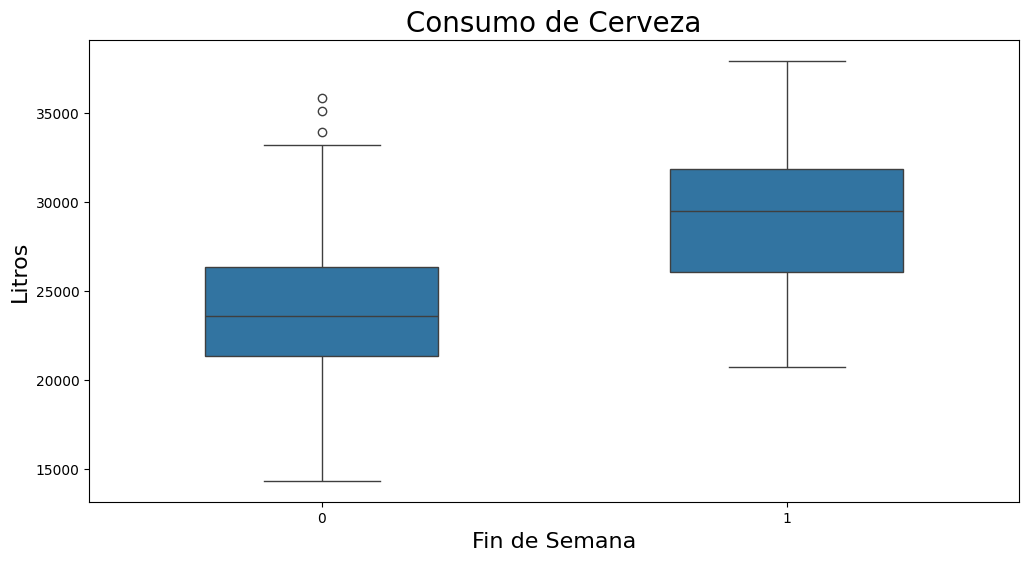

In [ ]:
ax=sns.boxplot(y='consumo',x='fds',data=datos,orient='v',width=0.5)
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveza',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Fin de Semana', fontsize=16)
ax;

Sobre los puntos fuera del límite superior del primer box plot, no nos debemos de preocupar porque estos puntos pueden ser días festivos que generaron un consumo muy alto de cerveza

**Configuración de color y estilo de la biblioteca *seaborn***

**Control de estilo:**

* API: https://seaborn.pydata.org/api.html#style-api

* Tutorial: https://seaborn.pydata.org/tutorial/aesthetics.html#aesthetics-tutorial

**Paleta de colores**

* API: https://seaborn.pydata.org/api.html#palette-api

* Tutorial: https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette('Accent')

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style('darkgrid')

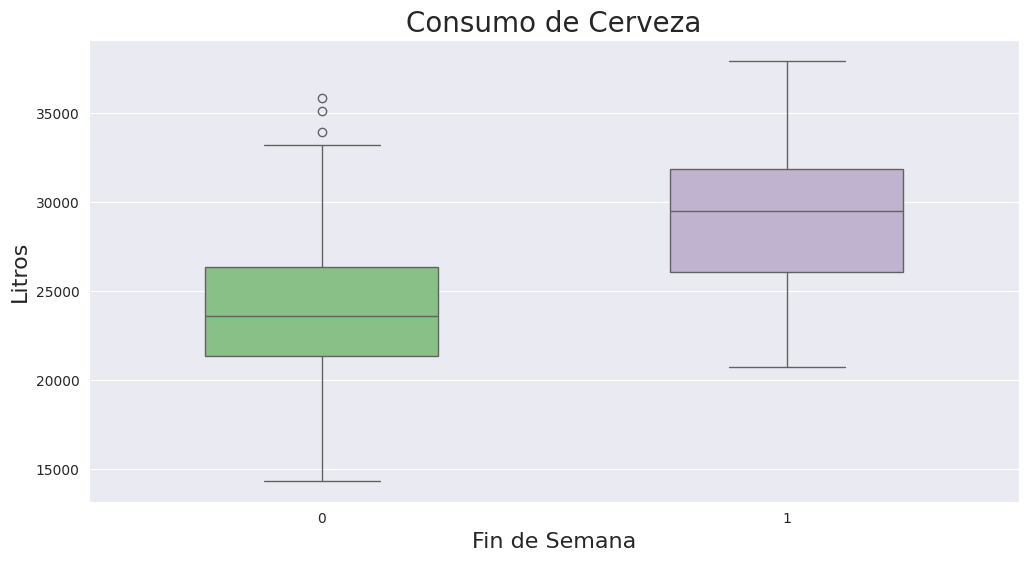

In [ ]:
ax=sns.boxplot(y='consumo',x='fds',data=datos,orient='v',width=0.5, palette='Accent')
ax.figure.set_size_inches(12,6)
ax.set_title('Consumo de Cerveza',fontsize=20)
ax.set_ylabel('Litros', fontsize=16)
ax.set_xlabel('Fin de Semana', fontsize=16)
ax;

### 2.4 Distribución de frecuencias (Histograma)

Un histograma es un tipo de gráfico de barras que representa la distribución de frecuencias de un conjunto de datos numéricos. En un histograma, se dividen los datos en intervalos, llamados "bins" o "clases", y se cuenta el número de observaciones que caen dentro de cada intervalo. Luego, se dibujan barras rectangulares para representar visualmente estas frecuencias.

Cada barra en el histograma representa un intervalo de valores en el eje horizontal (también conocido como eje X o eje de las abscisas) y la altura de la barra indica la frecuencia con la que ocurren los valores dentro de ese intervalo en el conjunto de datos. En otras palabras, la altura de la barra muestra cuántas observaciones caen en ese intervalo en particular.

El histograma es una herramienta útil para visualizar la distribución de un conjunto de datos y entender la forma general de la distribución, incluyendo si es simétrica, sesgada hacia la derecha o hacia la izquierda, o multimodal. Además, permite identificar valores atípicos o anomalías en los datos.

Distribución de frecuencias de la variable *dependiente* (y)


https://seaborn.pydata.org/generated/seaborn.distplot.html?highlight=distplot#seaborn.distplot

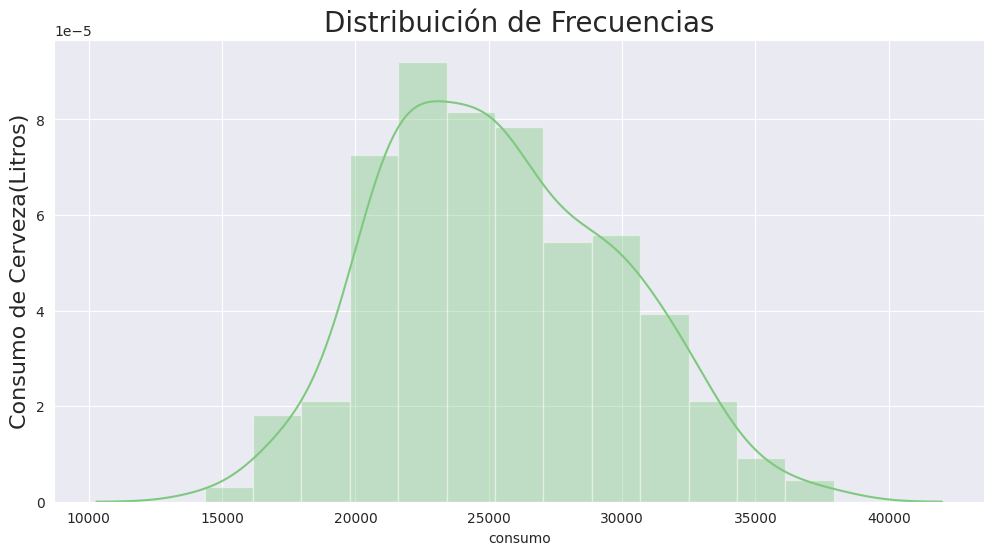

In [ ]:
ax=sns.distplot(datos['consumo'])
ax.figure.set_size_inches(12,6)
ax.set_title('Distribuición de Frecuencias',fontsize=20)
ax.set_ylabel('Consumo de Cerveza(Litros)', fontsize=16)
ax;

Mirando nuestro histograma, podemos ver una pequeña asimetría en la cola derecha. Cumple nuestro proyecto, solo queremos estimar un modelo de regresión para predecir la variable consumo, entonces no tenemos que preocuparnos por eso.

Ahora bien, si estuviéramos en otra situación donde se calculan ciertos tests estáticos que dependen de la hipótesis de normalidad, entonces tendríamos que hacer ciertas transformaciones en los datos o incluso aumentar el número de observaciones, para ver si tenemos una distribución más simétrica.

También vale la pena recordar que los gráficos que hemos visto hasta ahora, representan tests informales y que existen tests formales para verificar si los datos realmente siguen una distribución normal

## **3. Variable Dependiente vs Variables Explicativas (pairplot)**

### 3.1 Pairplot

Un pairplot es una herramienta de visualización que muestra la relación entre pares de variables en un conjunto de datos. Es especialmente útil cuando se quiere explorar la relación entre múltiples variables de forma rápida y visual.

En un pairplot, cada gráfico de dispersión muestra la relación entre dos variables diferentes. Si tenemos N variables en nuestro conjunto de datos, el pairplot generará una matriz de NxN gráficos de dispersión, donde cada gráfico muestra la relación entre una variable en el eje X y otra en el eje Y.

Además de los gráficos de dispersión en la diagonal principal, que muestran la distribución univariada de cada variable, los gráficos fuera de la diagonal muestran la relación bivariada entre las variables correspondientes. Esto permite identificar patrones, tendencias y posibles correlaciones entre las variables.

El pairplot es una herramienta muy útil en el análisis exploratorio de datos para comprender la estructura del conjunto de datos y para identificar posibles relaciones entre las variables antes de realizar un modelado más detallado.

**seaborn.pairplot:** https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Grafica la relación entre pares de variables en un dataset.

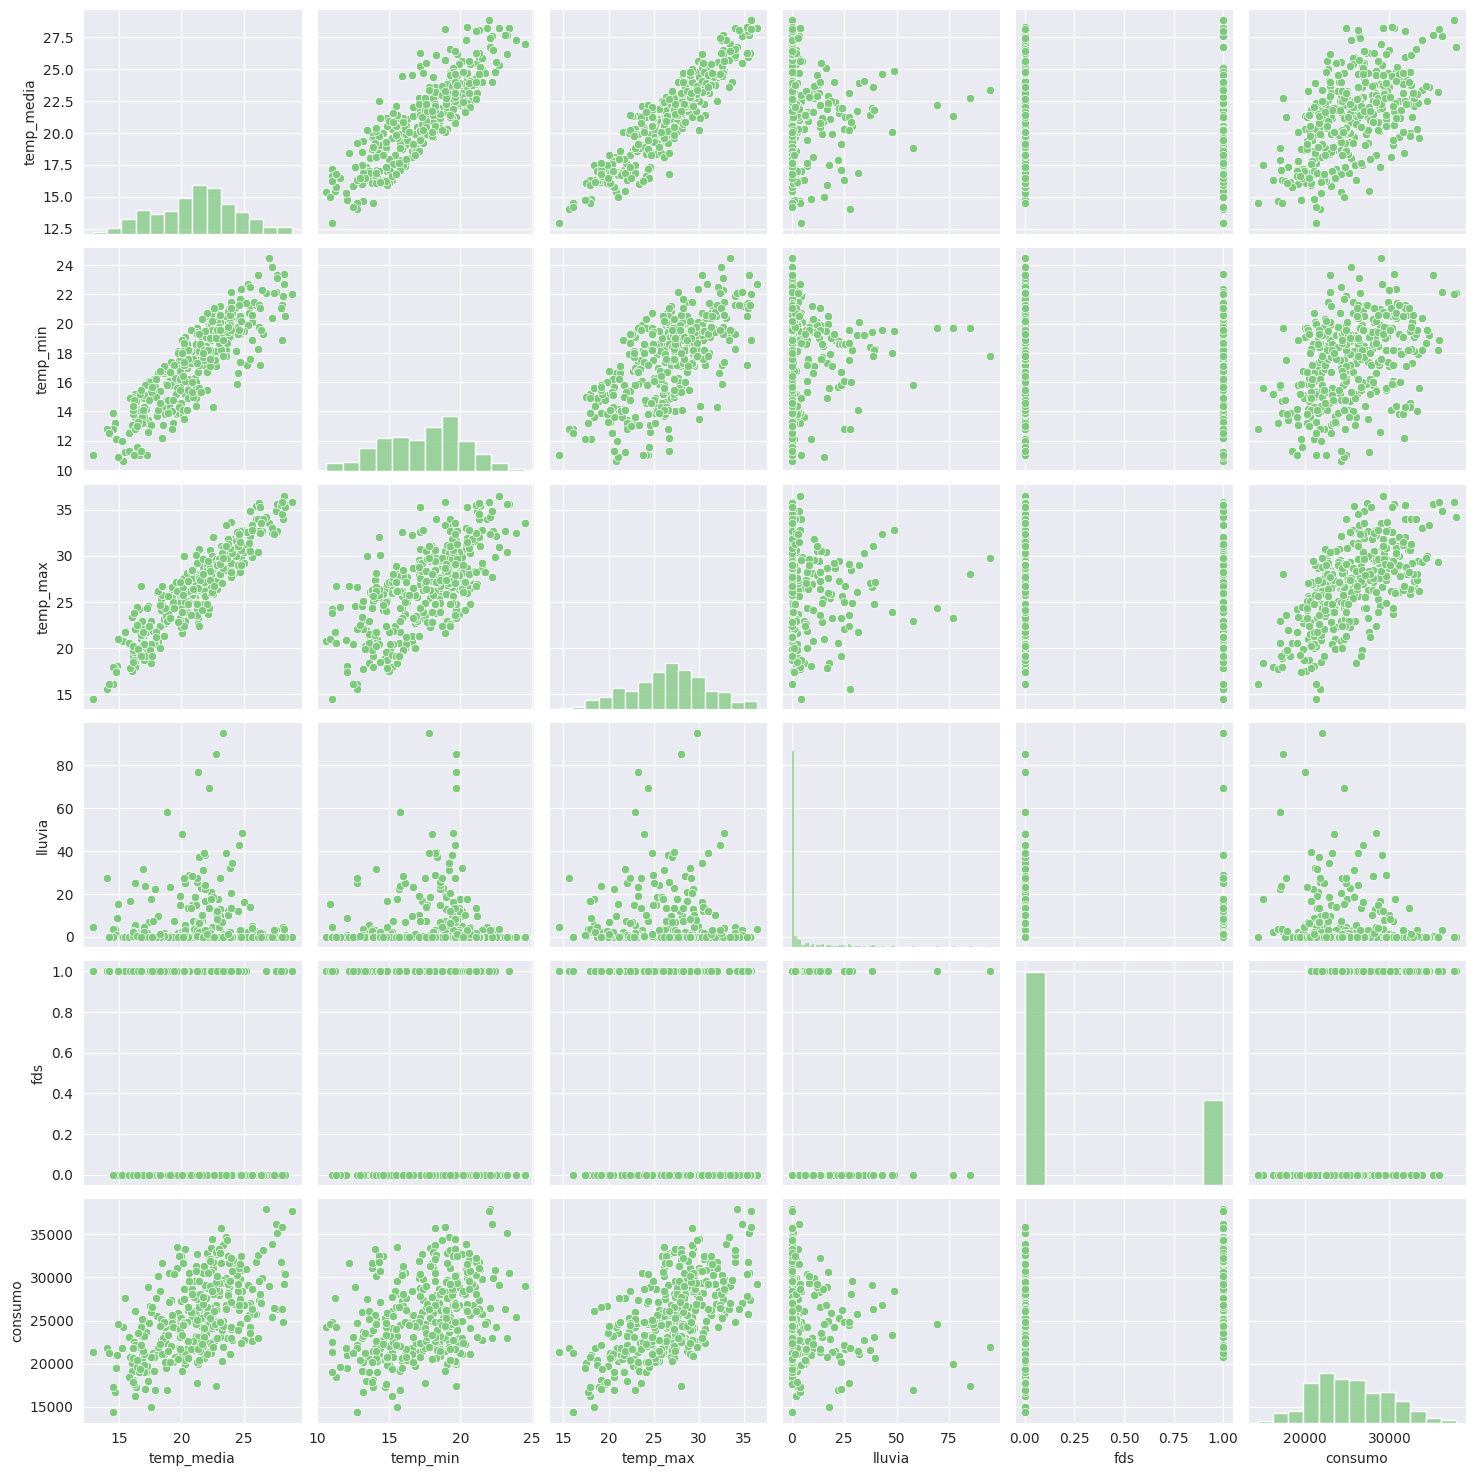

In [ ]:
ax=sns.pairplot(datos)

Como no tenemos muchas variables, podemos visualizarlos sin problemas. Pero en caso de que tengamos muchas variables, la visualización de este gráfico será difícil, lo que nos obligaría a hacer un scatter plot individual para cada caso.

Vemos que este gráfico muestra una relación entre todas las variables. Pero solo nos interesa la relación entre consumo y las otras variables, entonces centrémonos solo en la última línea del gráfico

Graficar el pairplot fijando solo una variable en el eje y.

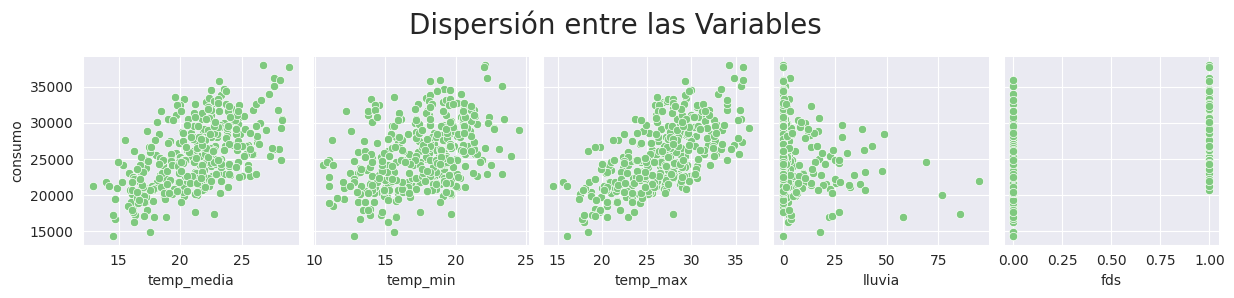

In [ ]:
ax=sns.pairplot(datos, y_vars= 'consumo', x_vars=['temp_media', 'temp_min', 'temp_max','lluvia','fds'], diag_kind=None )
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.15)
ax;

Tenemos un gráfico mejor. Podemos ver una cierta relación entre el consumo y las temperaturas mínimas y medias.

A medida que aumente el consumo, entonces estas temperaturas también aumentan y viceversa. Lo mismo pasa con la temperatura máxima, pero su relación lineal con el consumo es más fuerte y podemos ver que los puntos se ajustarían mejor a una recta con pendiente positiva que sería entonces la recta de regresión.

Por tanto, si trazamos la recta de regresión a estos puntos, vamos a ver que los errores serán menores que en los dos primeros scatter plots. Ahora, con respecto a la lluvia, vemos una mayor dispersión de los puntos, es decir, una relación lineal más débil con el consumo y vemos una concentración de puntos en el valor 0 ya que no llueve todos los días.

Aun así, todavía podemos ver una cierta tendencia a la baja. O sea, cuanto más lluvia, menos cerveza se consume. Y por último, como el fin semana es una variable categórica que solo tiene dos categorías, scatter plot es similar al boxplot que hicimos anteriormente, segregando el consumo entre consumo de semana y consumo durante los fines de semana, donde podemos ver un aumento del consumo durante los fines de semana y tal vez podríamos ver una línea trazada desde aquí hasta aquí.

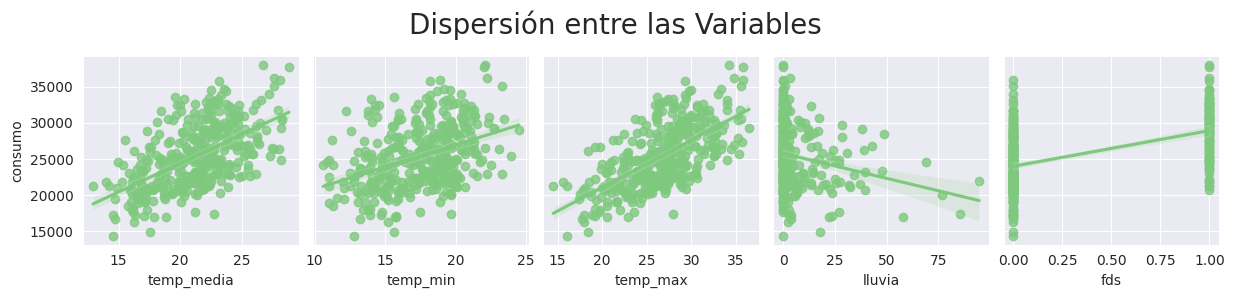

In [ ]:
ax=sns.pairplot(datos, y_vars= 'consumo', x_vars=['temp_media', 'temp_min', 'temp_max','lluvia','fds'], diag_kind=None, kind='reg' )
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.15)
ax;

Y lo que hará entonces, lo que el parámetro kind, lo que la función **reg** hizo es trazar una recta de regresión entre el consumo y todas las otras variables. Con eso podemos ver que los puntos de scatter plot del consumo frente a la temperatura máxima se ajustan mejor a la recta de regresión.

En cuanto a la lluvia tenemos una recta con pendiente negativa, mostrando una tendencia a la baja. Finalmente, vemos una tendencia alcista con respecto a la variable fin de semana, por lo que vemos la recta de regresión con pendiente positiva.

En suma, estos gráficos son simplemente la representación gráfica de la matriz de correlación.

### 3.2 jointplot



Un jointplot es una herramienta de visualización que muestra la relación entre dos variables y sus distribuciones marginales de forma conjunta. Es una forma eficaz de explorar la relación entre dos variables y examinar su distribución conjunta y univariada al mismo tiempo.

En un jointplot, el gráfico principal es un gráfico de dispersión que muestra la relación entre las dos variables. Además del gráfico de dispersión, en los márgenes superior e izquierdo del gráfico principal, se muestran los histogramas de las dos variables, lo que permite visualizar sus distribuciones univariadas.

El jointplot es útil para identificar patrones y tendencias en los datos, así como para detectar posibles correlaciones entre las variables. Además, proporciona información sobre la distribución de cada variable por separado, lo que puede ser útil para comprender mejor la naturaleza de los datos.

https://seaborn.pydata.org/generated/seaborn.jointplot.html?highlight=jointplot#seaborn.jointplot

* Grafica la relación entre dos variables y sus respectivas distribuciones de frecuencia.

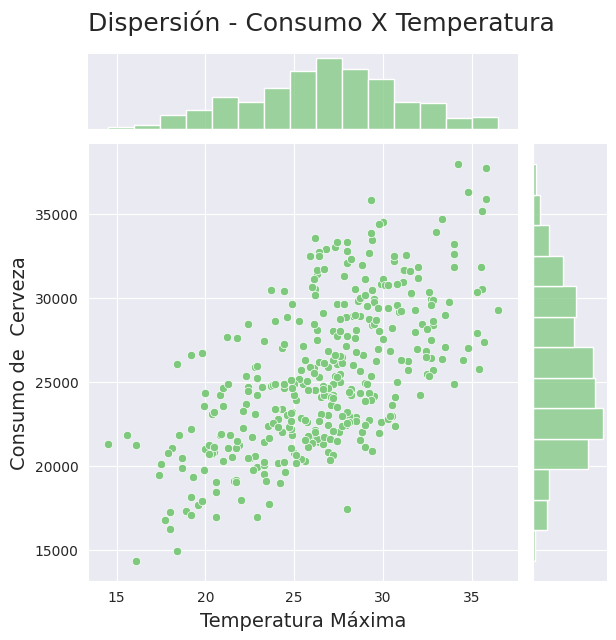

In [ ]:
ax=sns.jointplot(x='temp_max',y='consumo',data=datos)
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de  Cerveza', fontsize=14)
ax;

* Graficar un jointplot con la recta de regresión estimada

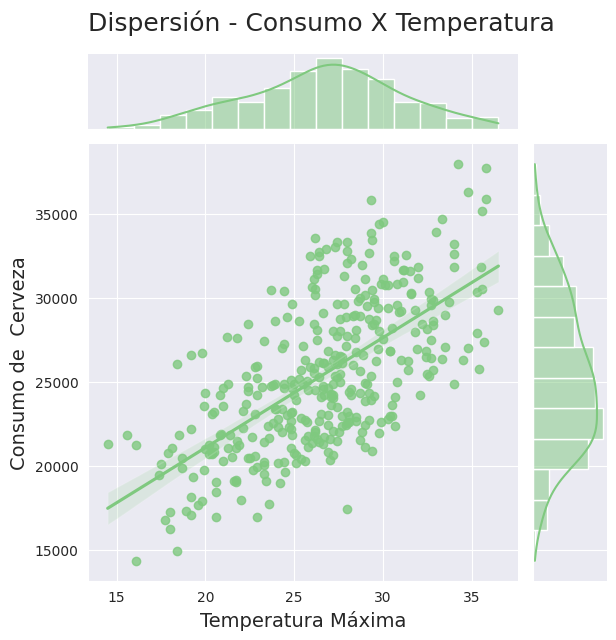

In [ ]:
ax=sns.jointplot(x='temp_max',y='consumo',data=datos,kind='reg')
ax.fig.suptitle('Dispersión - Consumo X Temperatura', fontsize=18, y=1.05)
ax.set_axis_labels('Temperatura Máxima', 'Consumo de  Cerveza', fontsize=14)
ax;

### 3.3 Lmplot



El lmplot es una combinación de gráficos de dispersión y gráficos de regresión lineal. Específicamente, muestra un gráfico de dispersión para visualizar la relación entre dos variables y superpone una línea de regresión lineal ajustada a esos datos. Esto hace que sea útil para investigar la relación lineal entre dos variables y ver cómo se ajusta una línea de regresión a los datos observados.

https://seaborn.pydata.org/generated/seaborn.lmplot.html?highlight=lmplot#seaborn.lmplot

* Trazar la recta de regresión entre dos variables junto con la dispersión entre ellas.

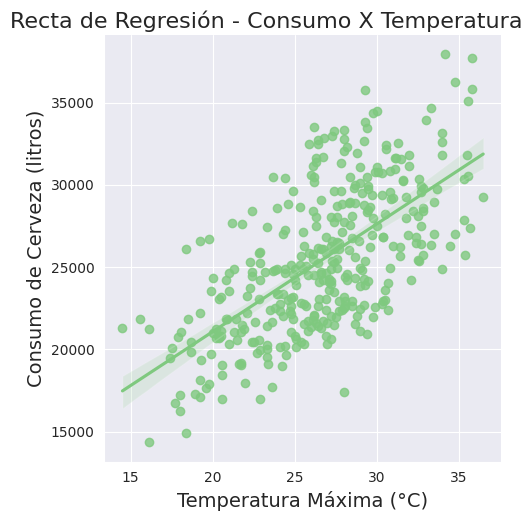

In [ ]:
ax=sns.lmplot(x='temp_max',y='consumo',data=datos)
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax;

Nos da lo que vimos en los gráficos anteriores, el diagrama de dispersión entre el consumo y temperatura máxima y la línea de regresión.

**Tipo 1:** En este tipo de gráfico, se muestra la regresión lineal con un intervalo de confianza sombreado alrededor de la línea de regresión. Es útil para visualizar la tendencia general de los datos y la incertidumbre asociada con la regresión.

* Graficar un lmplot con una tercera variable en el análisis (tipo I).

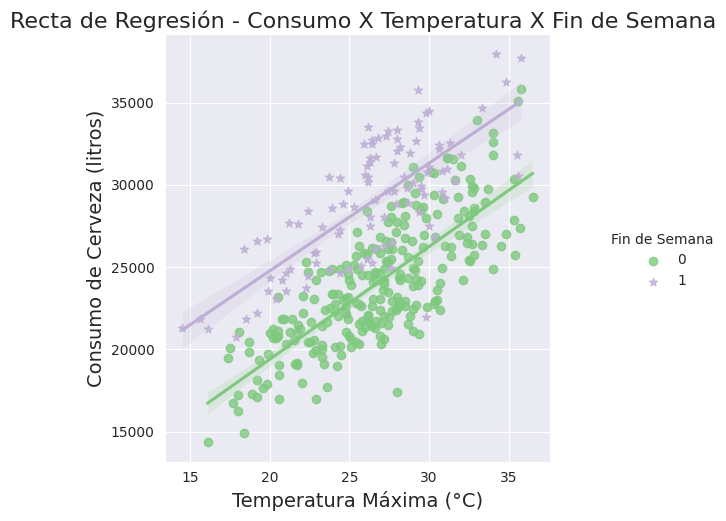

In [ ]:
ax=sns.lmplot(x='temp_max',y='consumo',data=datos,hue='fds',markers=['o','*'],legend=False)
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura X Fin de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax.add_legend(title='Fin de Semana')
ax;

Y aquí tenemos un diagrama de dispersión donde 0 significa que no es fin de semana, representado por los círculos en verde, y 1 es fin de semana representado por asteriscos y violeta. Como resultado tenemos dos rectas de regresión ajustadas en cada categoría y podemos ver un cambio de nivel donde el nivel de consumo es más alto en los fines de semana.

**Tipo 2:** En este tipo de gráfico, se muestra la regresión lineal junto con los intervalos de confianza para la pendiente y el intercepto de la línea de regresión. Esto proporciona una representación más detallada de la incertidumbre en la estimación de la regresión.

* Graficar un lmplot con una tercera variable en el análisis (tipo II).

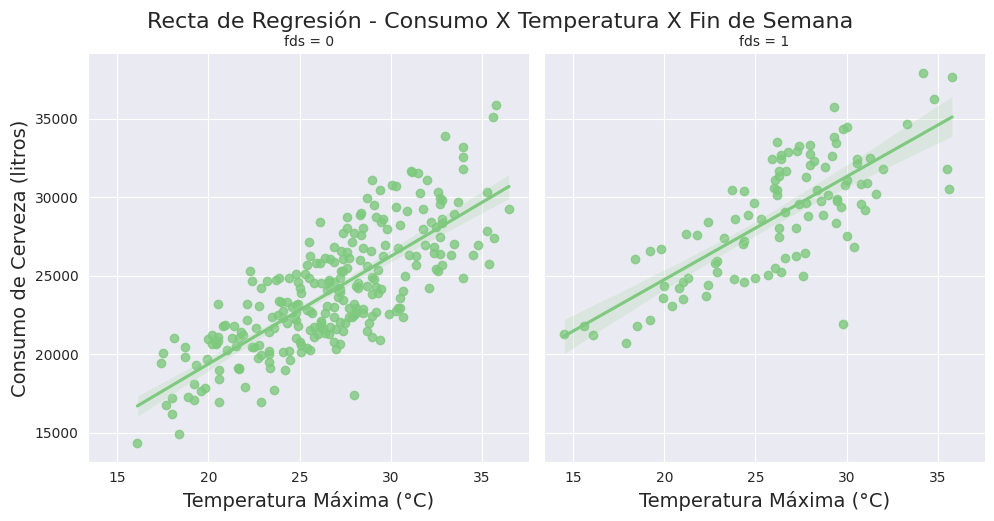

In [ ]:
ax=sns.lmplot(x='temp_max',y='consumo',data=datos,col='fds')
ax.fig.suptitle('Recta de Regresión - Consumo X Temperatura X Fin de Semana', fontsize=16, y=1.02)
ax.set_xlabels("Temperatura Máxima (°C)", fontsize=14)
ax.set_ylabels("Consumo de Cerveza (litros)", fontsize=14)
ax;

Entonces tenemos el mismo gráfico anterior pero dividido en dos, 0 para cuando no es fin de semana y 1 para fin de semana.

## **4. Datasets de entrenamiento y prueba**

### 4.1 Estimando un Modelo de Regresión Lineal para el Consumo

**Regresión Lineal:** El análisis de regresión se refiere al estudio de la dependencia de una variable (la variable <b> dependiente </b>) en relación con una o más variables (las variables <b> explicativas </b>) con el fin de estimar y/o predecir el valor medio de la primera en términos de los valores conocidos o fijos de estas últimas.</p>


* scikit-learn (https://scikit-learn.org/stable/)
El *scikit-learn* es un módulo de Python especializado en soluciones para *machine learning*.



Antes de estimar un modelo de regresión, realizaremos un procedimiento muy común en la ciencia de datos, que consiste en dividir los datos en un conjunto de entrenamiento para estimar el modelo y en un conjunto de pruebas para evaluarlo.

Para ello usaremos la función train_test_split de la biblioteca scikit-learn. Para los que no saben scikit-learn es una biblioteca especializada en modelos de Machine learning.

* Importando el *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

Antes de usar la función. Ella pide dos parámetros de entrada. El primero es un DataFrame que contiene la variable dependiente.

* Creando una Series (pandas) para almacenar el Consumo de Cerveza (y).

In [ ]:
y=datos['consumo']

Y el segundo parámetro de entrada es el DataFrame, que contiene las variables explicativas. Siguiendo la nomenclatura, lo llamaremos X mayúscula.

* Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [ ]:
X=datos[['temp_max','lluvia','fds']]

* Creando los datasets de entrenamiento y de prueba

La función devuelve una lista de cuatro elementos, donde asignamos a cada elemento su respectivo contenido, manteniendo el orden en el que aparecen en la lista.

* El primer elemento de la lista es **X_train**, que corresponde a las variables explicativas del conjunto de entrenamiento. Proporciona los valores de las variables explicativas asignadas a este conjunto.

* El segundo elemento de la lista es **X_test**, que corresponde a las variables explicativas del conjunto de prueba. Proporciona los valores de las variables explicativas asignadas a este conjunto.

* El tercer elemento es **y_train**, relacionado con X_train. Ambos tienen los mismos registros, refiriéndose a los mismos días del año 2015. Mientras X_train contiene las variables explicativas, y_train contiene la variable dependiente.

* Por último, tenemos **y_test**, que corresponde a la variable dependiente del conjunto de prueba, relacionada con X_test.

La función requiere los siguientes parámetros de entrada:

* X: el DataFrame de las variables explicativas que hemos definido aquí.
* y: la variable dependiente.

Como ya están definidos, solo necesitamos escribirlos: (X, y).

La función también solicita el parámetro **test_size**, que representa el porcentaje de datos que se separarán para el conjunto de prueba. Un valor común es 0.3, lo que implica que el 30% de los datos se asignarán al conjunto de prueba.

Con esto, la función seleccionará aleatoriamente el 30% de las observaciones de nuestro conjunto de datos para el conjunto de prueba, mientras que el 70% restante se asignará al conjunto de entrenamiento, utilizado para estimar el modelo. Además, podemos especificar el parámetro **random_state**, que actúa como una semilla para generar números aleatorios. Al establecer un valor específico, como 2811, garantizamos que se generarán los mismos conjuntos de entrenamiento y prueba cada vez que se ejecute el código. Se sugiere utilizar el valor 2811 para mantener la reproducibilidad de los resultados.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=2811)



* Comprobando los tamaños de los archivos generados por la función *train_test_split*.

In [ ]:
X_train.shape

(255, 3)

Tenemos un DataFrame, con 255 líneas o días y 3 columnas, que son las tres variables explicativas: temperatura máxima, lluvia y fin de semana.

In [ ]:
X_test.shape

(110, 3)

 vemos que se han asignado 110 días para el conjunto de pruebas y también tenemos 3 columnas que son las mismas variables explicativas y lo mismo vamos a tener para y_train e y_test. En total sumando del tamaño del conjunto de entrenamiento al del conjunto de pruebas, obviamente tenemos que tener 365 días.

 Podemos confirmar eso haciendo lo siguiente:

In [ ]:
X_train.shape[0]+X_test.shape[0]

365

Aquí tenemos la representación de un modelo de regresión para tres variables explicativas que es el caso de nuestro proyecto, pero en realidad podemos tener más de tres variables o incluso menos.

En caso de tener una sola variable, el modelo se denomina modelo de regresión lineal simple. En nuestro caso, ya tenemos un modelo de regresión lineal múltiple. (Y) , como vimos, representa la variable dependiente que nuestro caso es el consumo. β1 en esta ecuación es el intercepto, es donde la recta de regresión corta el eje Y.

* Los β restantes son las pendientes parciales del modelo, también llamadas coeficientes de regresión.

* Las de X son las variables explicativas, en nuestro caso X2 representa la temperatura máxima, X3 la lluvia y X4 es fin de semana.

* Y finalmente u es el componente de error que nos dice qué parte de la variación Y no pudo ser explicada por nuestra ecuación y eso sí representa los datos.

<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_01.jpg'>

* Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

Importamos también la función métricas que es responsable de evaluar la calidad de la estimación del modelo.

* Instanciando la clase *LinearRegression()*

In [ ]:
modelo = LinearRegression()

* Utilizando el método *fit()* del objeto "modelo" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y_train e X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo.fit(X_train,y_train)

LinearRegression()

* Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

**Coeficiente de Determinación - R²:** El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

In [ ]:
# Score es la función que calcula el coeficiente de terminación, el R2.
print('R²={}'.format(modelo.score(X_train,y_train).round(2)))

R²=0.73


Entonces el R2 asume valores de 0 a 1 y cuanto más cerca de 1, mejor es el ajuste o bondad del modelo. Cómo vemos aquí, incluso con pocas variables y datos, ya tenemos un R2 de 0.73 que es un valor razonable para un modelo de regresión. Esto quiere decir que el 73% de la variación media del consumo puede ser explicado por las variables explicativas.

Sin embargo, no basta con contentarse con este R2, ya que es una medida que evalúa el grado de ajuste del modelo en los datos de entrenamiento. Como nuestro principal objetivo es pronosticar el consumo, debemos evaluar el poder de pronóstico del modelo. Para ello debemos construir los pronósticos del consumo.

* Generando predicciones para los datos de ENTRENAMIENTO (X_test) con el método *predict()* del objeto "modelo"

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

Y aquí qué pide esta función? Solo necesita la X Hemos usado la X de entrenamiento para estimar nuestro modelo.

Ahora vamos a usar el X de prueba para ayudar a predecir el consumo.

In [ ]:
y_predicho=modelo.predict(X_test)


Ahora vamos a comparar las predicciones de consumo estimadas por el modelo con los valores reales. Es decir, vamos a comparar **y_predicho** con **y_test**, que son los valores reales de la variable dependiente, es decir, los valores de (y) que realmente ocurrieron. Podríamos calcular otro coeficiente de determinación R2, pero esta vez utilizando los datos de prueba, para entender cuán preciso fue nuestro pronóstico.

Para llevar a cabo esto, emplearé el método metrics de la biblioteca sklearn.

* Obteniendo el coeficiente de determinación (R²) para las predicciones del nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

R²=0.69


Con base en los datos de prueba obtenemos un R2 de casi 70%, menos que el R2 de los datos de entrenamiento, pero el valor sigue siendo razonable. Lo que podemos hacer para intentar incrementar este R2, que evalúa el poder de pronóstico del modelo, es incrementar el número de variables explicativas buscando otras variables y también el número de datos.

### 4.2 Obteniendo Predicciones Puntuales

Una vez que tenemos un grado de ajuste y pronóstico razonables, podemos comenzar a pronosticar el consumo de acuerdo con valores futuros, de las variables explicativas.

Por ejemplo:

In [ ]:
# Datos de Entrada
entrada=X_test[0:1]
entrada

,temp_max,lluvia,fds
5,30.5,12.2,0


Entonces para este día tenemos 30º de temperatura máxima, 12 mm de precipitación y es un día normal, o sea, no es fin de semana. Luego, en base a estos valores, podemos predecir el consumo, en base a esos valores específicos o puntuales podemos predecir el consumo de cerveza usando el modelo estimado.

Llamemos a estos valores de entrada escribiendo abajo

In [ ]:
# Generando predicción puntual
modelo.predict(entrada)[0]

26094.901775262017

Por tanto, para un día que no es fin de semana, con una previsión de 30º de temperatura máxima y 12 mm de precipitación, el consumo medio estimado de cerveza será de 26000 litros en la ciudad de San Pablo.

**Creando un simulador simple:** Ahora podemos calcular predicciones puntuales del consumo haciendo un pequeño simulador. Aquí vamos a crear primero los nombres de las variables que ya tenemos.



In [ ]:
temp_max=40
lluvia = 0
fds = 1
entrada=[[temp_max,lluvia,fds]]

print('''Para una temperatura maxima de 40°C, con 0 mm de presipitacion y en Fin
de Semana. Tendremos un consumo aproximado de:
{} litros'''.format(modelo.predict(entrada)[0].round(2)))

Para una temperatura maxima de 40°C, con 0 mm de presipitacion y en Fin
de Semana. Tendremos un consumo aproximado de:
38742.53 litros


### 4.3 Interpretación de los Coeficientes Estimados

Aquí presentamos la ecuación que describe nuestro modelo de regresión con tres variables explicativas.

Tenemos la variable dependiente \( y \), que representa el consumo de cerveza, y los coeficientes representados por β. β1 es el intercepto, y los demás son los coeficientes parciales de regresión.

Las \( X \) corresponden a las variables explicativas. Finalmente, el término de error representa la variación de la variable dependiente que no es explicada por el modelo. Esta variación en \( y \) es resultado de factores no considerados en el modelo y, por lo tanto, no puede ser predicha. Ahora procedemos a interpretar los coeficientes del modelo.


<img width='1000px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/reg_02.jpg'>

**Obteniendo el intercepto del modelo:**

El <b> intercepto </b> representa el efecto medio en $ Y $ (Consumo de cerveza) con todas las variables explicativas excluidas del modelo. Dicho de otra forma, el <b> intercepto </b> representa el efecto medio en $ Y $ (consumo de cerveza) cuando $ X_2 $ (temperatura máxima), $ X_3 $ (lluvia) y $ X_4 $ (fin de semana ) son iguales a cero.

In [ ]:
# Para ver el valor del intercepto
modelo.intercept_

5951.976339312445

**Obteniendo los coeficientes de regresión:**
Los <b> coeficientes de regresión </b> $\beta_2 $, $\beta_3 $ y $\beta_4 $ son conocidos como <b> coeficientes de regresión parcial </b> o <b> coeficientes angulares parciales </b> . Considerando el número de variables explicativas en nuestro modelo, su significado sería el siguiente: $ \beta_2 $ mide la variación en el valor medio de $ Y $ (Consumo de cerveza) por variación unitaria en $ X_2 $ (Temperatura máxima), manteniéndose constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de semana). En otras palabras, $ \beta_2 $ nos da el efecto "directo" o "neto" de una unidad de variación en $ X_2 $ sobre el valor medio de $ Y $, excluyendo los efectos que pueden tener $ X_3 $ y $ X_4 $ en el promedio de $ Y $. Del mismo modo podemos interpretar los demás coeficientes de regresión.

In [ ]:
# Para ver el valor de los coeficientes de regresión
modelo.coef_

array([ 684.73675898,  -60.7824355 , 5401.08333866])

* Confirmando el orden de las variables explicativas en el DataFrame

In [ ]:
X.columns

Index(['temp_max', 'lluvia', 'fds'], dtype='object')

* Creando una lista de nombres de las variables del modelo

In [ ]:
index=['Intercepto','Temperatura Máxima','Lluvia (mm)', 'Fin de Semana']

* Creando un DataFrame para almacenar los coeficientes del modelo

https://docs.scipy.org/doc/numpy/reference/generated/numpy.append.html?#numpy.append

In [ ]:
pd.DataFrame(data=np.append(modelo.intercept_,modelo.coef_),index=index, columns=['Parámetros'])

,Parámetros
Intercepto,5951.976339
Temperatura Máxima,684.736759
Lluvia (mm),-60.782435
Fin de Semana,5401.083339


**Interpretación de los coeficientes estimados:**


* <b>Intercepto</b> → Excluyendo el efecto de las variables explicativas ($ X_2 = X_3 = X_4 = 0 $) el efecto medio en el Consumo de Cerveza sería <b> 5951,98 litros</b>.



* <b>Temperatura Máxima (°C) </b> → Manteniendo constantes los valores de $ X_3 $ (Lluvia) y $ X_4 $ (Fin de Semana), el aumento de 1°C en la Temperatura Máxima genera una variación media en el Consumo de Cerveza de <b> 684,74 litros</b>.



* <b>Lluvia (mm) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura Máxima) y $ X_4 $ (Fin de Semana), la adición de 1 mm de Lluvia genera una variación media en el Consumo de Cerveza de <b > -60,78 litros</b>.



* <b>Fin de semana (Sí / No) </b> → Manteniendo constantes los valores de $ X_2 $ (Temperatura máxima) y $ X_3 $ (Lluvia), el hecho de que el día se clasifique como Fin de semana genera una variación media en el consumo de cerveza de <b> 5401,08 litros</b>.


### 4.4 Análisis gráfico de las predicciones del modelo

Realizaremos unos diagnósticos informales basados en los gráficos para ver si algunas hipótesis básicas del modelo de regresión están siendo cumplidas.

El cumplimiento de esas hipótesis es importante para realizar diferentes estadísticas, como por ejemplo pruebas de hipótesis sobre los parámetros estimados y construcción de intervalos de confianza para los pronósticos. En definitiva, el cumplimiento de esas hipótesis es importante para que los resultados obtenidos por nuestros modelos sean válidos.

¿Y cómo haremos esos diagnósticos? Esos diagnósticos son siempre realizados en los datos de entrenamiento, pues son con ellos que el modelo es ajustado. Por tanto, lo primero que vamos a hacer es crear estimaciones del consumo en base a los datos de entrenamiento.

A estas predicciones las vamos llamar **y_predicho_train**. Y vamos a usar la función **predict** de nuestro modelo ajustado.

* Generando predicciones del modelo para los datos de ENTRENAMIENTO

In [ ]:
y_predicho_train=modelo.predict(X_train)

* Gráfico de dispersión entre valor estimado y valor real

https://seaborn.pydata.org/generated/seaborn.scatterplot.html

Entonces aquí tenemos el **y_predicho** o estimado en base a los datos de entrenamiento. Ahora pasamos al diagrama de dispersión entre el valor estimado y el valor real del consumo, para que podamos entonces ver gráficamente el grado de ajuste del modelo.

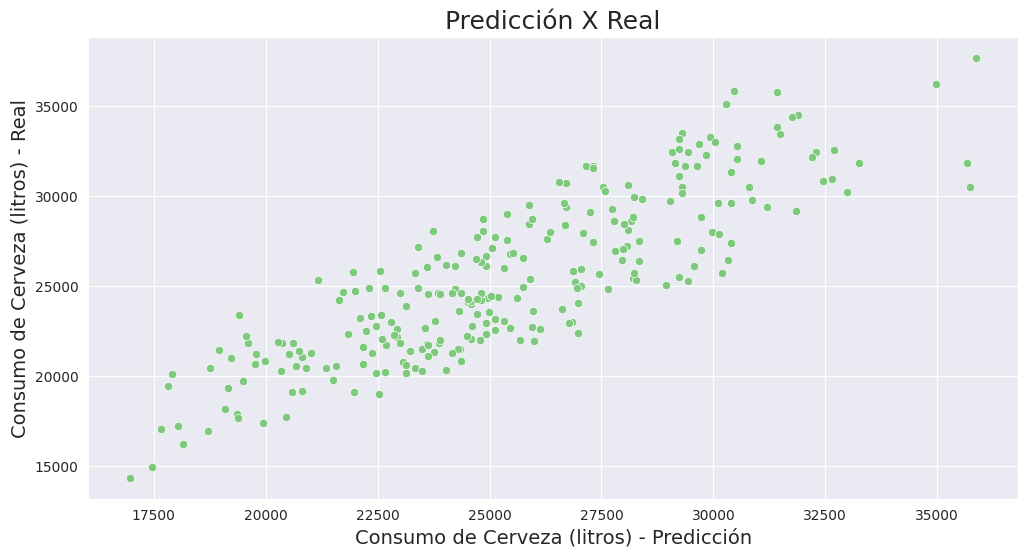

In [ ]:
ax=sns.scatterplot(x=y_predicho_train,y=y_train)
ax.figure.set_size_inches(12, 6)
ax.set_title('Predicción X Real', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Predicción', fontsize=14)
ax.set_ylabel('Consumo de Cerveza (litros) - Real', fontsize=14)
ax;

Al visualizar una recta de regresión que atraviesa estos puntos, podemos notar un ajuste variable a lo largo de la línea. Sin embargo, observamos ciertos problemas: los puntos en el extremo del gráfico parecen dispersarse cuando el consumo es alto.

Este fenómeno sugiere que el modelo se ajusta mejor a valores más bajos de consumo, pero a medida que el consumo aumenta, el ajuste del modelo se deteriora, evidenciando una mayor variación. Esta discrepancia no es ideal, ya que esperaríamos que todos los puntos se ajustaran a la línea de regresión sin desviaciones significativas.

Para comprender mejor esta dinámica, debemos analizar los residuos del modelo. Los residuos, en este contexto, representan la diferencia entre los valores observados **(y real)** y los valores predichos **(y predicho)**. Por lo tanto, calcularemos los residuos como la diferencia entre **(y)** real **(representado por y_train)** y y predicho **(que será y_predicho_train)**.

* Obteniendo los residuos

In [ ]:
residuo = y_train - y_predicho_train
residuo

195    3891.289113
344    4040.499863
288   -3010.078635
59    -1704.289133
220    4223.837237
          ...     
73     3186.229912
68     -739.805532
215    3010.236465
341    2588.394409
84     1631.868243
Name: consumo, Length: 255, dtype: float64

El resultado es una serie donde nuestros residuos del modelo ajustado está almacenado.

* Gráfico de dispersión entre valor estimado y residuos

Método informal para verificar la hipótesis de varianza constante de los residuos (homocedasticidad)

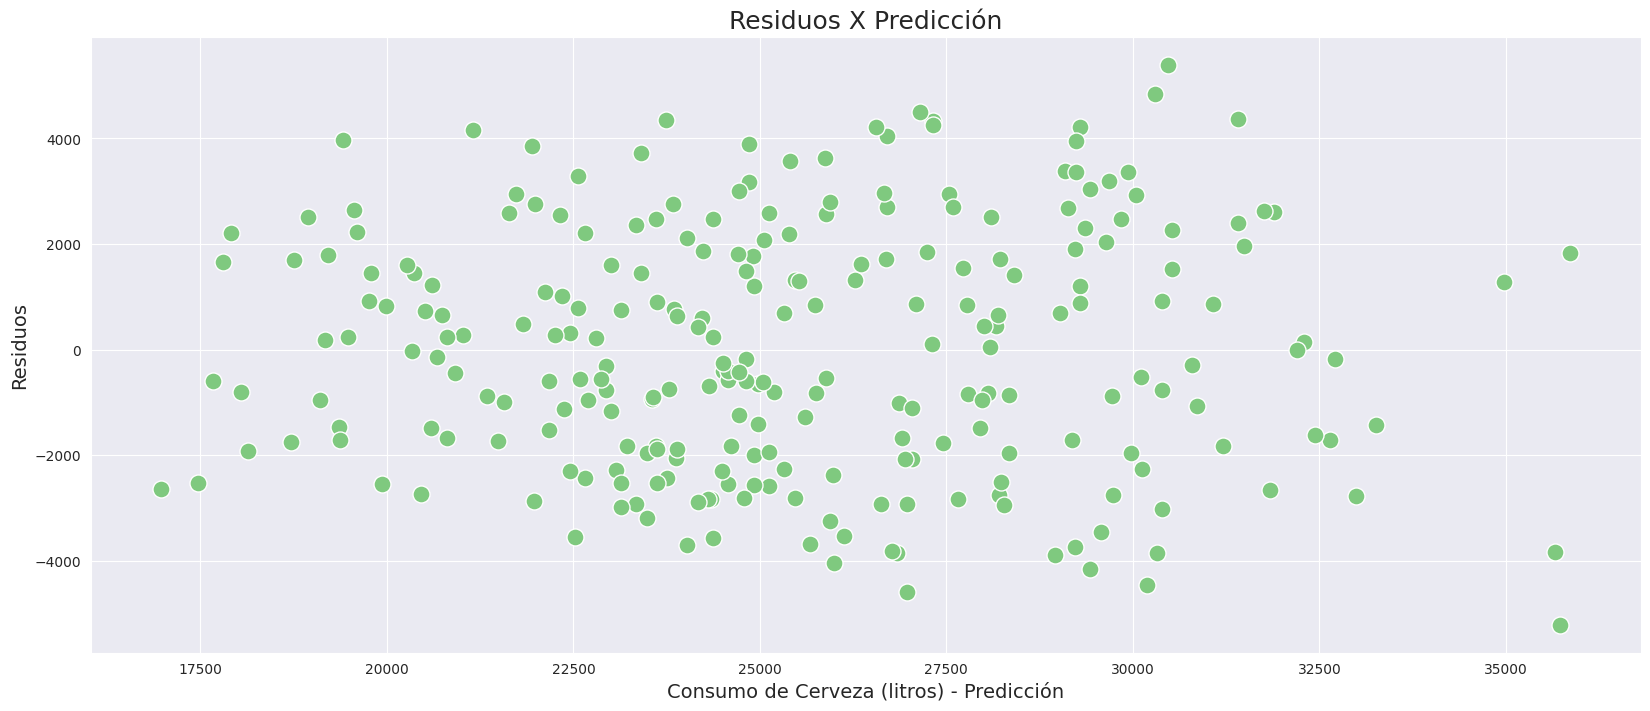

In [ ]:
ax=sns.scatterplot(x=y_predicho_train,y=residuo,s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residuos X Predicción', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Predicción', fontsize=14)
ax.set_ylabel('Residuos', fontsize=14)
ax;

En nuestro gráfico, se observa que las variaciones de los residuos aumentan notablemente en el segmento correspondiente a los valores más altos del consumo estimado. Dentro de este rango, los residuos oscilan entre aproximadamente -2000 y 4000. Sin embargo, al expandir el análisis a un rango más amplio del consumo, observamos que los residuos varían entre casi -4000 y casi 5000.

Esta inconsistencia en las variaciones de los residuos a lo largo del espectro del consumo contradice el principio de homocedasticidad, que establece que los residuos deberían mostrar una variación constante. Para evaluar de manera más clara la presencia de una variación constante en los residuos, podemos generar un gráfico similar, pero esta vez utilizando los residuos al cuadrado. Al hacerlo, obtendremos solo valores positivos, lo que facilitará la identificación de patrones o tendencias en los residuos.

<img width='1500px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/var_u.jpg'>
Fuente: Econometria Básica - 5ª edición - Gujarati y Porter

* Usando los residuos al cuadrado

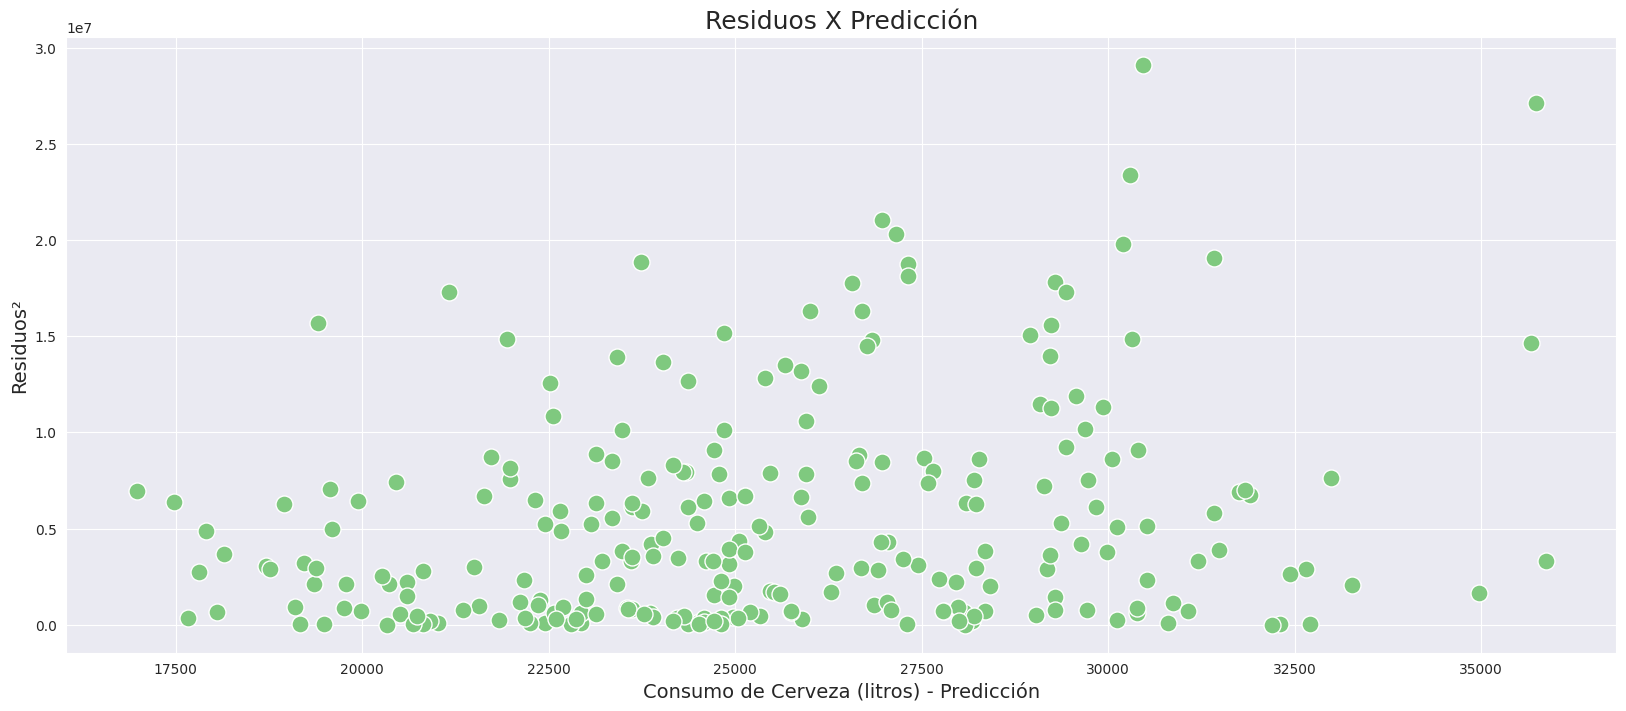

In [ ]:
ax=sns.scatterplot(x=y_predicho_train,y=residuo**2,s=150)
ax.figure.set_size_inches(20, 8)
ax.set_title('Residuos X Predicción', fontsize=18)
ax.set_xlabel('Consumo de Cerveza (litros) - Predicción', fontsize=14)
ax.set_ylabel('Residuos²', fontsize=14)
ax;


Nuestro scatterplot muestra un comportamiento que se asemeja al segundo gráfico de nuestra imagen, el cual exhibe una tendencia creciente en la varianza de los residuos. Este hallazgo sugiere la posible presencia de heterocedasticidad en nuestro modelo, lo cual es una señal preocupante. Sin embargo, el primer paso siempre es analizar gráficamente los residuos, tal como estamos haciendo aquí.

Una estrategia para mitigar la heterocedasticidad podría ser aumentar el tamaño de la muestra de datos. Recordemos que solo contamos con 365 observaciones en total, y nuestro modelo se estimó utilizando el 70% de estas observaciones, es decir, 255 observaciones, lo cual podría resultar insuficiente.

Además, otra fuente potencial de heterocedasticidad podría ser la omisión de alguna variable explicativa importante que aún no hemos identificado. No obstante, este tema quedará pendiente para futuros análisis. Por el momento, nuestro objetivo es aprender a realizar análisis gráficos para detectar este tipo de problemas.

A continuación, procederemos a examinar si los residuos siguen una distribución normal, para lo cual construiremos un histograma de los residuos.

* Graficando la distribuición de frecuencias de los residuos

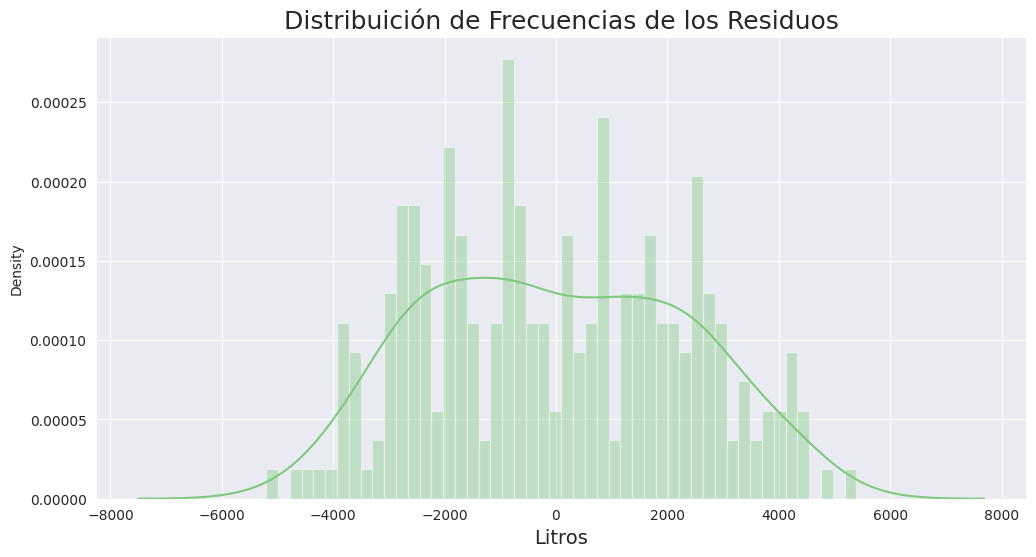

In [ ]:
ax=sns.distplot(residuo,bins=50)
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias de los Residuos', fontsize=18)
ax.set_xlabel('Litros', fontsize=14)
ax;

Observamos que la distribución de los residuos no es simétrica y presenta múltiples picos, lo que sugiere que no podemos asumir que los residuos siguen una distribución normal.

Estos son los principales hallazgos que debemos considerar para evaluar la validez de nuestro modelo ajustado y sus predicciones.

* El primero de estos hallazgos es la homocedasticidad, que implica una varianza constante de los residuos.
* El segundo es la suposición de que los residuos se distribuyen normalmente.

Además, dado que nuestro proyecto implica datos temporales, es relevante verificar la hipótesis de autocorrelación de los residuos.

La autocorrelación de los residuos evalúa si los residuos en un momento dado están influenciados por sus valores anteriores. Esto puede determinarse mediante un análisis de los residuos a lo largo del tiempo para identificar cualquier patrón o tendencia. Sin embargo, es importante destacar que el análisis de la autocorrelación es un tema más avanzado que podría requerir un conocimiento especializado en series temporales.



## **5. Comparando Modelos**

Generalmente trabajamos con dataset, que tiene muchas variables y puede ser de nuestro interés probar diferentes conjuntos de variables explicativas para ver cuál representa mejor la variación de la variable dependiente.

Esto es muy común en el trabajo del científico de datos, como por ejemplo podríamos tener más variables explicativas en el conjunto de datos para ayudar a predecir el consumo como los ingresos de las personas que han consumido.

Como el objetivo de este capitulo es solo presentar técnicas para comparar modelos con una combinación diferente de variables explicativas, simplemente estimaremos un nuevo modelo con la sustitución de la variable explicativa temperatura máxima por temperatura media y lo compararemos con el modelo anterior, donde se usa la temperatura máxima.

El primer paso es crear un nuevo conjunto de variables explicativas que llamaremos X2, y vamos a trabajar entonces, con la temperatura media, lluvia y fin de semana. Y la variable dependiente obviamente continuará siendo la misma, que es el consumo de cerveza.

* Estimación de un nuevo modelo con la sustitución de la variable explicativa Temperatura máxima por Temperatura media.

In [ ]:
X2=datos[['temp_media','lluvia','fds']]

Ahora vamos a repetir todo el proceso anterior de definir los conjuntos de entrenamiento y prueba.

Estimaremos el modelo utilización del nuevo conjunto de variables explicativas. Solo vamos a reemplazar X por X2.

* Creando los datasets de entrenamiento y de prueba

In [ ]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y,test_size=0.3,random_state=2811)

Recuerda que en los vídeos anteriores llamamos modelo a nuestro modelo ajustado. Ahora al nuevo modelo ajustado llamaremos modelo_2

* Instanciar la clase *LinearRegression()*

In [ ]:
modelo_2=LinearRegression()

Una vez hecho eso, vamos a estimar el nuevo modelo haciendo modelo_2.fit. Fit es la función del objeto LinearRegression, que estima los coeficientes.

* Usando el método *fit()* del objeto "modelo_2" para estimar nuestro modelo lineal con los datos de ENTRENAMIENTO (y2_train e X2_train)

In [ ]:
modelo_2.fit(X2_train,y2_train)

LinearRegression()

Ahora ya podemos calcular el R2 del nuevo modelo.  

* Obteniendo el coeficiente de determinación (R²) del nuevo modelo estimado y comparando con el resultado del modelo anterior

In [ ]:
print('Modelo con Temp. Media')
print('R²={}'.format(modelo_2.score(X2_train,y2_train).round(2)))

Modelo con Temp. Media
R²=0.66


In [ ]:
print('Modelo con Temp. Máxima')
print('R²={}'.format(modelo.score(X_train,y_train).round(2)))

Modelo con Temp. Máxima
R²=0.73


Y vemos que el nuevo modelo produce un R2 más bajo, es decir, el antiguo modelo con temperatura máxima se ajusta mejor a los datos. Ahora vamos a comparar el poder de predicción de los modelos usando el R2 para los datos de prueba, pero antes tenemos que calcular las predicciones del nuevo modelo usando el conjunto de pruebas.

* Generando predicciones para los datos de PRUEBA (X_test e X2_test) con el método *predict()* de los objetos "modelo" e "modelo_2"

In [ ]:
y_predicho_2=modelo_2.predict(X2_test)

* Obteniendo el coeficiente de determinación (R²) para las predicciones de los dos modelos

In [ ]:
print('Modelo con Temp. Media')
print('R²={}'.format(metrics.r2_score(y2_test,y_predicho_2).round(2)))

Modelo con Temp. Media
R²=0.66


In [ ]:
print('Modelo con Temp. Máxima')
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

Modelo con Temp. Máxima
R²=0.69


Entonces podemos concluir que el modelo antiguo explica mejor la variación del consumo, tanto en términos de ajuste, pues presenta un R2 con los datos de entrenamiento más altos que el R2 del modelo nuevo, como en términos de pronóstico, viendo el R2 para los datos de prueba.

### 5.1 Otras Métricas de Regresión

**Métricas da regresión**


Fuente: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar varios modelos estimados y seleccionar el mejor modelo. Las principales métricas de regresión que scikit-learn pone a disposición para los modelos lineales son las siguientes:

**Error Cuadrático Medio**

Media de los cuadrados de los errores. Los mejores ajustes tienen un $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

**Raíz del Error Cuadrático Medio**

Raíz cuadrada de la media de los cuadrados de los errores. Los mejores ajustes tienen un $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$



La diferencia entre las dos es que la primera métrica se expresa en datos cuadrados, es decir, ella nos da información en litros al cuadrado, mientras que la segunda vez que se expresa en la misma unidad que la variable dependiente, es decir, representa la variación media del error de pronóstico en litros, así que su interpretación es más sencilla que la primera.

Estas métricas se calcula el conjunto de pruebas y a diferencia del R2, el objetivo es minimizar el valor de estas dos métricas, ya que el objetivo es ver qué modelo genera la menor cantidad de errores de pronóstico. Primero, vamos a calcular estas métricas para el modelo que usa la temperatura media en lugar de la temperatura máxima.

* Obteniendo métricas para el modelo con Temperatura Media

In [ ]:
# Error Cuadrático Medio
EQM_2=metrics.mean_squared_error(y2_test,y_predicho_2).round(2)
# Raíz del Error Cuadrático Medio
REQM_2=np.sqrt(EQM_2).round(2)
# R**2 para la compracion
R2_2=metrics.r2_score(y2_test,y_predicho_2).round(2)
# DataFrame
pd.DataFrame([EQM_2,REQM_2,R2_2],['EQM_2','REQM_2','R2_2'],columns=['Métricas'])

,Métricas
EQM_2,6060775.46
REQM_2,2461.86
R2_2,0.66


* Obteniendo métricas para el modelo con Temperatura Máxima

In [ ]:
# Error Cuadrático Medio
EQM=metrics.mean_squared_error(y_test,y_predicho).round(2)
# Raíz del Error Cuadrático Medio
REQM=np.sqrt(EQM).round(2)
# R**2 para la compracion
R2=metrics.r2_score(y_test,y_predicho).round(2)
# DataFrame
pd.DataFrame([EQM,REQM,R2],['EQM','REQM','R2'],columns=['Métricas'])

,Métricas
EQM,5471976.38
REQM,2339.23
R2,0.69


Comparando los resultados de los dos modelos, podemos ver que el modelo original que utiliza la temperatura máxima produce menores errores de previsión, por eso los valores del error cuadrático medio y su raíz son más bajos que los del modelo con temperatura media y también tiene un modelo de pronóstico superior dado por la R2 que es superior al R2 del modelo con temperatura media.

Por tanto, podemos concluir que el modelo antiguo, el original, es más apropiado para predecir el consumo. Bueno, es importante mencionar que aquí hemos comparado modelos con el mismo número de variables explicativas y que la ventaja de usar las dos primeras medidas es que podemos usarlas para comparar modelos con diferentes cantidades de variables explicativas.

Como por ejemplo comparar un modelo con cuatro variables explicativas con un modelo con tres, mientras que el R2 solo es apropiado cuando comparamos modelos con la misma cantidad de variables explicativas, como en nuestros dos modelos.

La razón es que el R2 tiende a aumentar de valor, incluso si agregamos variables que no ayudan mucho a predecir la variable dependiente. Eso es lo que llamamos problema de **overfitting**. En el peor de los casos, el R2 permanecerá constante, pero nunca disminuirá de valor.

Por lo tanto, un modelo que tiene más variables explicativas no generará necesariamente errores de pronóstico más bajos que un modelo con menos variables explicativas.

## **6. Guardando y cargando el modelo estimado**

### 6.1 Usando Piclke


"Pickle" es un módulo en Python que se utiliza para serializar y deserializar objetos de Python. La serialización se refiere al proceso de convertir un objeto en una secuencia de bytes, que luego puede ser escrita en un archivo o transmitida a través de una red. La deserialización es el proceso inverso, donde una secuencia de bytes se convierte nuevamente en un objeto de Python.

El módulo pickle permite guardar objetos de Python en archivos y luego recuperarlos más tarde. Esto es útil cuando se desea guardar el estado de un objeto complejo y luego restaurarlo en una sesión posterior. Los objetos que se pueden picklear incluyen casi todos los tipos de datos de Python, como listas, diccionarios, clases personalizadas, funciones, etc.

Usaremos el modelo estimado y guardaremos sus resultados para que podamos usarlo para pronosticar el consumo en caso de que tengamos nuevos valores para las variables explicativas, pero sin necesidad de repetir todo el procedimiento que hicimos para estimar el modelo, así podríamos generar previsiones del consumo según los nuevos valores de las variables explicativas en un nuevo notebook sin necesidad de repetir todo el procedimiento realizado.

Pero es bueno mencionar que esto solo se puede hacer si fuéramos a usar las mismas variables explicativas. Si incluimos una variable más o cambiamos algunas de ellas, tendremos que repetir todo el procedimiento de estimación nuevamente.

Recapitulado en el capitulo donde hicimos pronósticos puntuales del consumo aquí habíamos usado el modelo que usa temperatura máxima, cuyo nombre le habíamos dado modelo. Y habíamos hecho un ejemplo para pronosticar el consumo según el input que estaba formado por la primera línea del DataFrame X.

 Así, para un día con temperatura máxima de 30ºC, 12 mm de lluvia y que no sea fin de semana, el consumo de cerveza es de aproximadamente 26000 litros.

* Datos de entrada

In [ ]:
X_test[0:1]

,temp_max,lluvia,fds
5,30.5,12.2,0


In [ ]:
entrada = X_test[0:1]

* Generando predicción puntual

In [ ]:
modelo.predict(entrada)[0]

26094.901775262017

* Creando un simulador simple

Y luego habíamos creado este pequeño simulador donde calcula la previsión del consumo medio según valores arbitrarios de las variables explicativas.  Así podríamos variar cualquiera de los valores de las variables explicativas. Y tendríamos el consumo medio estimado

In [ ]:
temp_max=30.5
lluvia=12.2
fds=0
entrada=[[temp_max, lluvia, fds]]

print('{} litros'.format(modelo.predict(entrada)[0].round(2)))

26094.9 litros


* Guardando el modelo estimado

 Lo que vamos a hacer ahora es generalizar este simulador de manera que seamos capaces de calcular la previsión del consumo para valores puntuales de las variables explicativas, sin necesidad de repetir todo el procedimiento de estimación del modelo que utiliza la temperatura máxima.

 Para ello usaremos la biblioteca Pickle, cuya documentación se puede encontrar en el link. Con él guardaremos el modelo ya está tomada y lo usaremos para pronosticar el consumo según cualquier valor de las variables explicativas, sean valores nuevos o arbitrarios.

El módulo pickle implementa protocolos binarios para serializar y deserializar la estructura de un objeto Python. Es decir, esta función almacena en la memoria el modelo ya estimado, lo guarda en un archivo binario en una carpeta para que podamos usarlo posteriormente cuando y donde queramos.

pickle (https://docs.python.org/3/library/pickle.html)

<p style='font-size: 20px; line-height: 2; margin: 10px 50px; text-align: justify;'>El módulo <b> pickle </b> implementa protocolos binarios para serializar y deserializar la estructura de un objeto Python.</p>

In [ ]:
import pickle

In [ ]:
output=open('modelo_consumo_cerveza','wb')
pickle.dump(modelo,output)
output.close()

En un nuevo notebook/proyeto Python

* In [1]:

```sh
import pickle

modelo = open('modelo_consumo_cerveza','rb')
lm_new = pickle.load(modelo)
modelo.close()

temp_max = 30.5
lluvia = 12.2
fds = 0
entrada = [[temp_max, lluvia, fds]]
print('{} litros'.format(lm_new.predict(entrada)[0].round(2)))
```

* Out [1]:

```
26094.90 litros
```

## **7. Desafio**

### 7.1 Conociendo el Dataset

* Importando bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings

warnings.filterwarnings('ignore') # ou warnings.filterwarnings(action='once')

* El Dataset y el Proyecto

**Fuente:** https://www.kaggle.com/greenwing1985/housepricing

**Descripción:** Nuestro objetivo en este ejercicio es crear un modelo de Machine Learning, mediante la técnica de regresión lineal, que haga predicciones sobre los precios de las propriedades a partir de un conjunto de características conocidas de las propriedades.

Usaremos un dataset disponible en Kaggle que fue generado por ordenador para entrenamiento de machine learning para principiantes. Este conjunto de datos fue modificado para facilitar nuestro objetivo, que es fijar los conocimientos adquiridos en el proyecto de Regresión lineal.

Siga los pasos propuestos en los comentarios arriba de cada celda y buenos estudios.

**Datos:**

* <b>precio</b> - Precio de la propriedad</li>
* <b>área</b> - Área de la propriedad</li>
* <b>garaje</b> - Número de plazas de garaje</li>
* <b>baño</b> - Número de baños de la propriedad</li>
* <b>chimenea</b> - Número de chimeneas da la propriedad</li>
* <b>mármol</b> - Si la propiedad está acabada en mármol blanco (1) o no (0)</li>
* <b>piso</b> - Si la propiedad tiene más de un piso (1) o no (0)</li>


* Lectura de los datos


In [ ]:
datos_casas = pd.read_csv('HousePrices_HalfMil.csv', sep=';')

* Ver los datos

In [ ]:
datos_casas

,precios,area,garaje,banos,chimenea,marmol,pisos
0,51875,25,3,4,3,0,1
1,17875,35,1,3,1,0,0
2,47075,195,2,4,2,0,0
3,38575,33,2,2,1,0,1
4,33775,11,2,3,0,0,1
...,...,...,...,...,...,...,...
995,29150,48,1,5,4,0,0
996,43550,112,2,2,3,0,1
997,56575,185,3,4,4,0,1
998,56075,185,2,3,1,0,1


* Verificando el tamaño del dataset

In [ ]:
datos_casas.shape

(1000, 7)

### **7.2 Analisis Preliminar**

* Estadísticos descriptivos

In [ ]:
datos_casas.describe().round(2)

,precios,area,garaje,banos,chimenea,marmol,pisos
count,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00,1000.00
mean,41985.60,124.33,2.01,3.00,2.03,0.33,0.48
std,12140.39,72.39,0.81,1.43,1.42,0.47,0.50
min,13150.00,1.00,1.00,1.00,0.00,0.00,0.00
25%,33112.50,60.75,1.00,2.00,1.00,0.00,0.00
50%,41725.00,123.00,2.00,3.00,2.00,0.00,0.00
75%,51175.00,187.00,3.00,4.00,3.00,1.00,1.00
max,73675.00,249.00,3.00,5.00,4.00,1.00,1.00


**Matriz de correlación:** El coeficiente de correlación es una medida de asociación lineal entre dos variables y su valor está entre **-1 **y **+1** , dónde **- 1** indica asociación negativa perfecta y **+1** indica asociación positiva perfecta.

Observe las correlaciones entre las variables:

* ¿Cuáles están más correlacionadas con la variable dependiente (precio)?
* ¿Cuál es la relación entre ellas (positiva o negativa)?
* ¿Hay correlación fuerte entre las variables explicativas?

In [ ]:
datos_casas.corr().round(4)

,precios,area,garaje,banos,chimenea,marmol,pisos
precios,1.0000,0.1177,0.1028,0.1244,0.1072,0.4308,0.6315
area,0.1177,1.0000,-0.0075,-0.0114,0.0121,-0.0153,-0.0180
garaje,0.1028,-0.0075,1.0000,0.0671,0.0605,-0.0156,-0.0206
banos,0.1244,-0.0114,0.0671,1.0000,0.0484,-0.0253,-0.0182
chimenea,0.1072,0.0121,0.0605,0.0484,1.0000,0.0296,-0.0035
marmol,0.4308,-0.0153,-0.0156,-0.0253,0.0296,1.0000,-0.0065
pisos,0.6315,-0.0180,-0.0206,-0.0182,-0.0035,-0.0065,1.0000


### **7.3 Comportamiento de la Variable Dependiente (Y)**

* Análisis gráfico

<img width='700px' src='https://caelum-online-public.s3.amazonaws.com/ESP-1774-regresion-lineal/Box-Plot.png'>

* Configurandopnd el estilo y color de los gráficos (opcional)

In [ ]:
# palette -> Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, icefire, icefire_r, inferno, inferno_r, jet, jet_r, magma, magma_r, mako, mako_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, rocket, rocket_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, viridis, viridis_r, vlag, vlag_r, winter, winter_r
sns.set_palette("Accent")

# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")

* Box plot de la variable *dependiente* (y)

Evalúe el comportamiento de la distribución de la variable dependiente:

1. ¿Parece haber valores atípicos?
2. ¿El box plot muestra alguna asimetría?


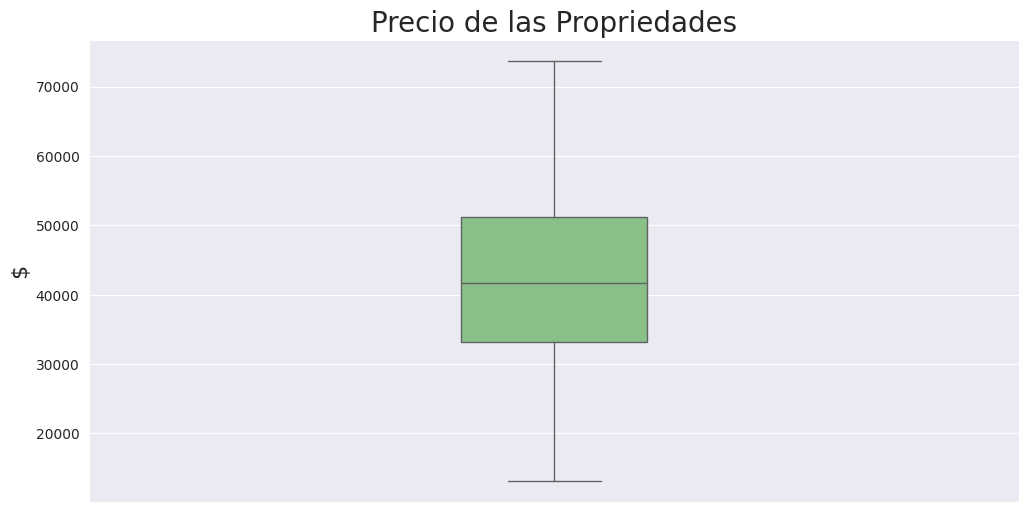

In [ ]:
ax = sns.boxplot(data=datos_casas['precios'], orient='v', width=0.2)
ax.figure.set_size_inches(12, 6)
ax.set_title('Precio de las Propriedades', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax;

* Investigando la variable dependiente (y) junto con otras características.

Construya un box plot de la variable dependiente junto con cada variable explicativa (solo las categóricas).

Evalúe el comportamiento de la distribución de la variable dependiente con cada variable explicativa categórica:

1. ¿Los estadísticos cambian significativamente entre las categorías?
2. ¿Tiene el box plot alguna tendencia bien definida?

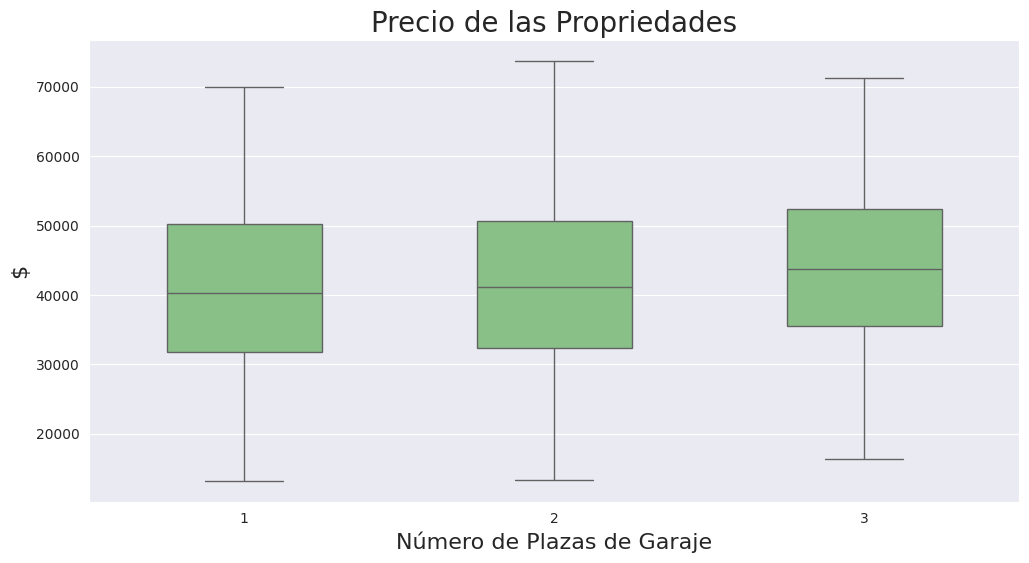

In [ ]:
# Box-plot (Precio X Garaje)
ax = sns.boxplot(y='precios', x='garaje', data=datos_casas, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Precio de las Propriedades', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Plazas de Garaje', fontsize=16)
ax;

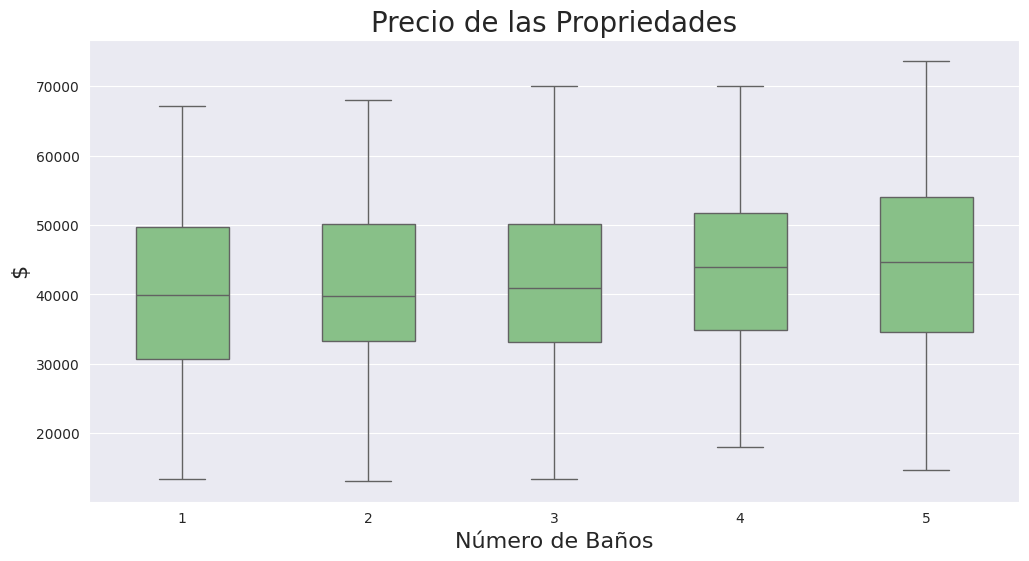

In [ ]:
# Box-plot (Precio X Baños)
ax = sns.boxplot(y='precios', x='banos', data=datos_casas, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Precio de las Propriedades', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Baños', fontsize=16)
ax;

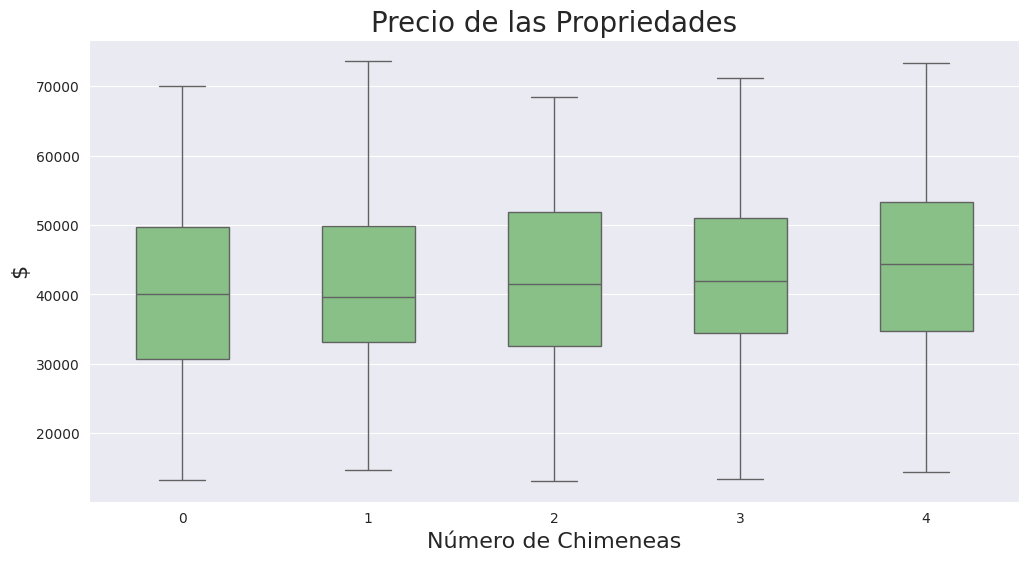

In [ ]:
# Box-plot (Precio X Chimenea)
ax = sns.boxplot(y='precios', x='chimenea', data=datos_casas, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Precio de las Propriedades', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Número de Chimeneas', fontsize=16)
ax;

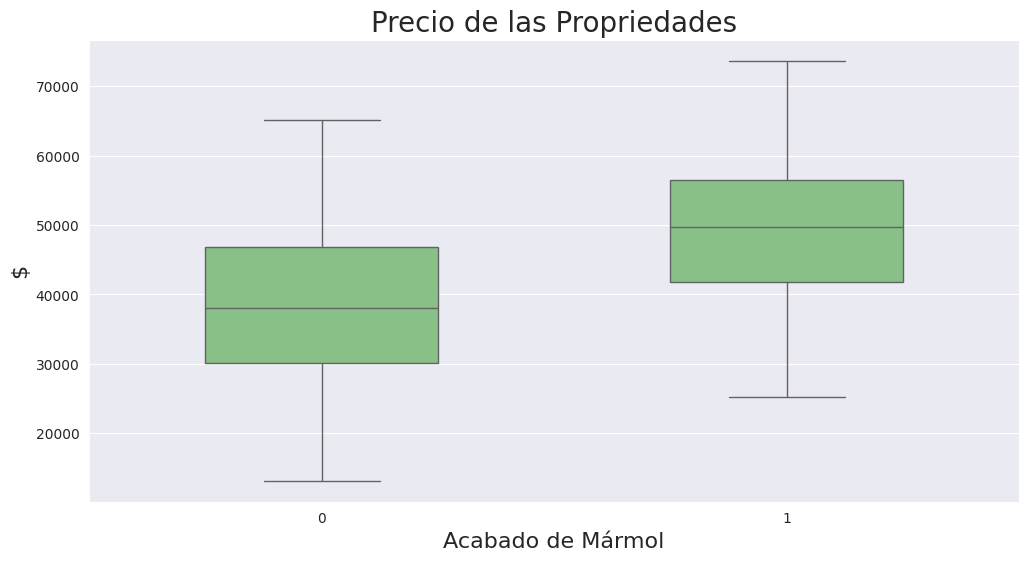

In [ ]:
# Box-plot (Precio X Acabado de Mármol)
ax = sns.boxplot(y='precios', x='marmol', data=datos_casas, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Precio de las Propriedades', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Acabado de Mármol', fontsize=16)
ax;

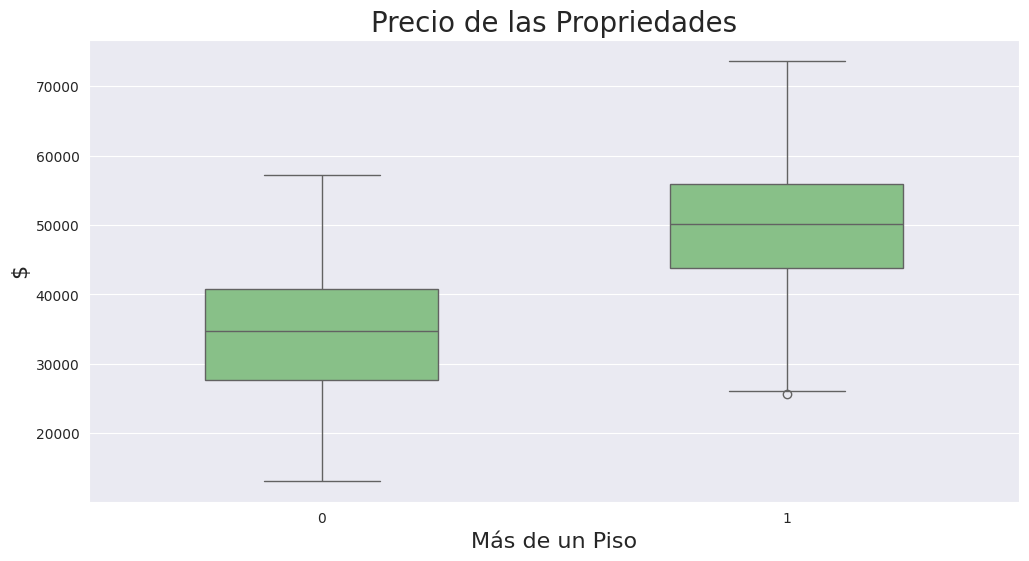

In [ ]:
# Box-plot (Precio X Pisos)
ax = sns.boxplot(y='precios', x='pisos', data=datos_casas, orient='v', width=0.5)
ax.figure.set_size_inches(12, 6)
ax.set_title('Precio de las Propriedades', fontsize=20)
ax.set_ylabel('$', fontsize=16)
ax.set_xlabel('Más de un Piso', fontsize=16)
ax;

* Distribución de frecuencias de la variable dependiente (y)

Construya un histograma de la variable dependiente (Precio).

Evalúe:
1. ¿Parece asimétrica la distribución de frecuencias de la variable dependiente?
2. ¿Es posible suponer que la variable dependiente sigue una distribución normal?

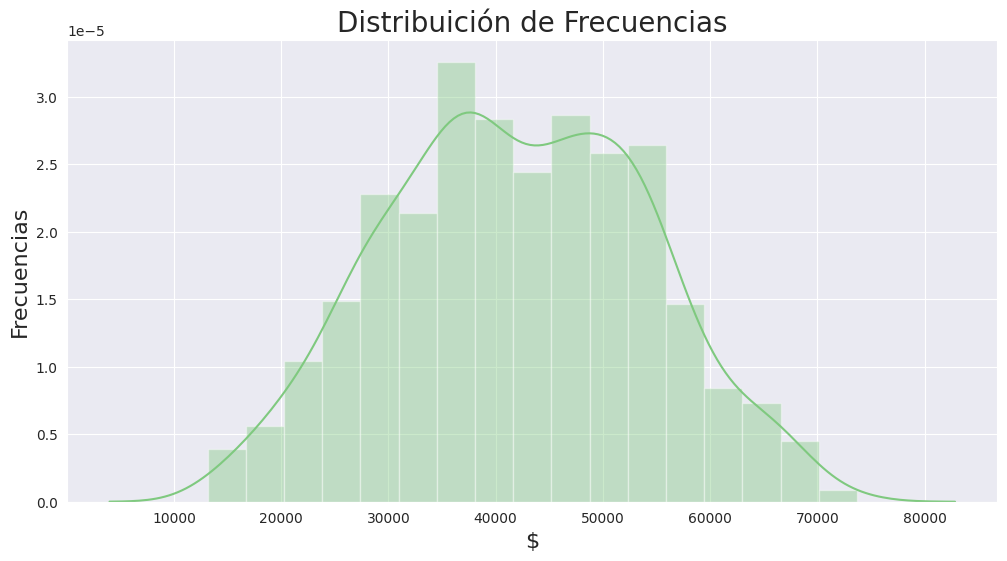

In [ ]:
ax = sns.distplot(datos_casas['precios'])
ax.figure.set_size_inches(12, 6)
ax.set_title('Distribuición de Frecuencias', fontsize=20)
ax.set_ylabel('Frecuencias', fontsize=16)
ax.set_xlabel('$', fontsize=16)
ax;

* Gráficos de dispersión entre las variables del dataset

Graficar el pairplot fijando solo una variable en el eje y

https://seaborn.pydata.org/generated/seaborn.pairplot.html?highlight=pairplot#seaborn.pairplot

Grafique diagramas de dispersión de la variable dependiente contra cada variable explicativa. Para ello utilice el pairplot de la biblioteca seaborn.

Construya el mismo gráfico usando el parámetro kind = 'reg'.

Evalúe:

1. ¿Es posible identificar alguna relación lineal entre las variables?
2. ¿La relación es positiva o negativa?
3. Compare con los resultados obtenidos en la matriz de correlación.


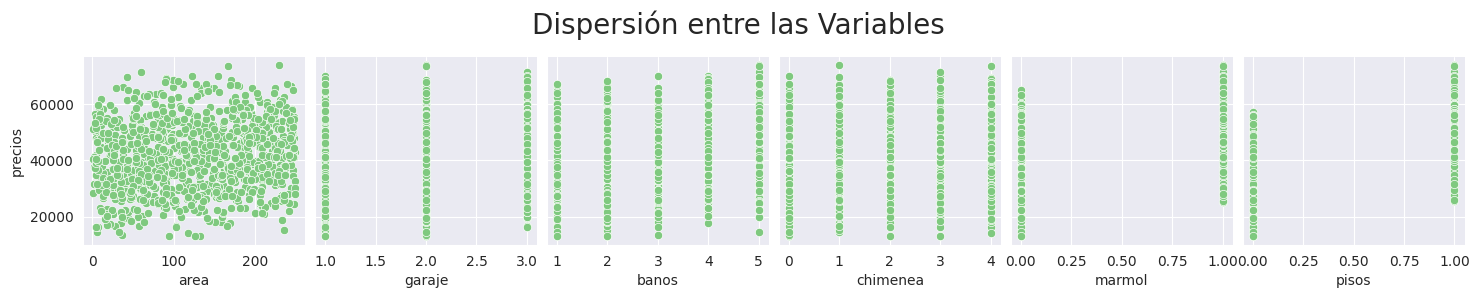

In [ ]:
ax = sns.pairplot(datos_casas, y_vars='precios', x_vars=['area', 'garaje', 'banos', 'chimenea', 'marmol', 'pisos'],diag_kind=None)
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.15)
ax;

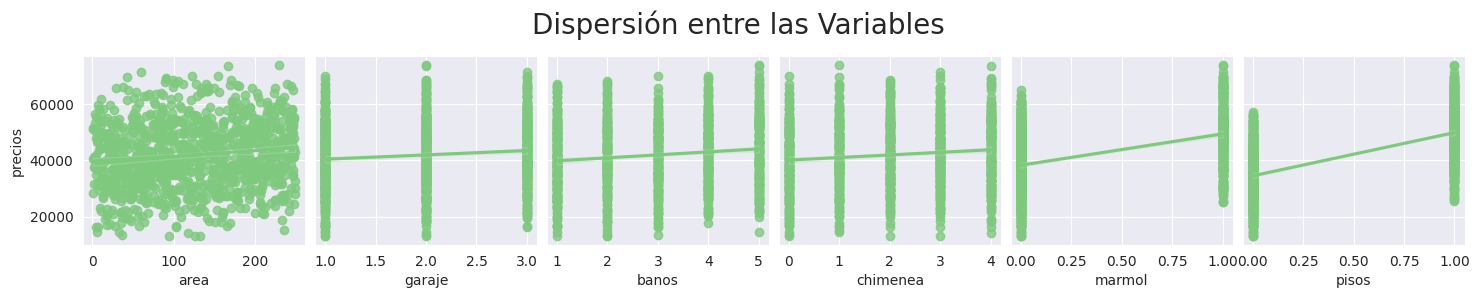

In [ ]:
ax = sns.pairplot(datos_casas, y_vars='precios', x_vars=['area', 'garaje', 'banos', 'chimenea', 'marmol', 'pisos'], diag_kind=None, kind='reg')
ax.fig.suptitle('Dispersión entre las Variables', fontsize=20, y=1.15)
ax;

### **7.4 Estimando un Modelo de Regresión Lineal**

* Importando *train_test_split* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [ ]:
from sklearn.model_selection import train_test_split

* Creando una Series (pandas) para almacenar la variable dependiente (y)

In [ ]:
y = datos_casas['precios']

* Creando un DataFrame (pandas) para almacenar las variables explicativas (X)

In [ ]:
X = datos_casas[['area', 'garaje', 'banos', 'chimenea', 'marmol', 'pisos']]

* Creando los datasets de entrenamiento y de prueba

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2811)

* Importando *LinearRegression* y *metrics* de la biblioteca *scikit-learn*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

https://scikit-learn.org/stable/modules/classes.html#regression-metrics

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics

* Instanciando la clase LinearRegression()

In [ ]:
modelo_casas = LinearRegression()

* Utilizando el método *fit()* para estimar el modelo lineal con los datos de ENTRENAMIENTO (y_train y X_train)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.fit

In [ ]:
modelo_casas.fit(X_train, y_train)

LinearRegression()

* Obteniendo el coeficiente de determinación (R²) del modelo estimado con los datos de ENTRENAMIENTO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score


Evalúe:

1. ¿El modelo presenta un buen ajuste?
2. ¿Recuerdas lo que representa R²?
3. ¿Qué podemos hacer para mejorar esta estadística?

In [ ]:
print('R² = {}'.format(modelo_casas.score(X_train, y_train).round(2)))

R² = 0.64


* Generando predicciones para los datos de PRUEBA (X_test) con el método *predict()*

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.predict

In [ ]:
y_predicho = modelo_casas.predict(X_test)

* Obteniendo el coeficiente de determinación (R²) para las predicciones de nuestro modelo

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html#sklearn.metrics.r2_score

In [ ]:
print('R²={}'.format(metrics.r2_score(y_test,y_predicho).round(2)))

R²=0.67


### **7.5 Obteniendo Predicciones Puntuales**

* Creando un simulador simple

Cree un simulador que genere estimaciones de precios a partir de un conjunto de informaciones sobre la propiedad.

In [ ]:
area=38
garaje=2
banos=4
chimenea=4
marmol=0
pisos=1

entrada=[[area, garaje, banos,chimenea, marmol, pisos]]

print('$ {}'.format(modelo_casas.predict(entrada)[0].round(2)))

$ 46389.8


### **7.6 Métricas de Regresión**

Fuente: https://scikit-learn.org/stable/modules/model_evaluation.html#regression-metrics

Algunas estadísticas obtenidas del modelo de regresión son muy útiles como criterio para comparar varios modelos estimados y seleccionar el mejor modelo. Las principales métricas de regresión que scikit-learn pone a disposición para los modelos lineales son las siguientes:

**Error Cuadrático Medio:** Media de los cuadrados de los errores. Los mejores ajustes tienen un $EQM$ más bajo.

$$EQM(y, \hat{y}) = \frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2$$

**Raíz del Error Cuadrático Medio:** Raíz cuadrada de la media de los cuadrados de los errores. Los mejores ajustes tienen un $\sqrt{EQM}$ más bajo.

$$\sqrt{EQM(y, \hat{y})} = \sqrt{\frac 1n\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}$$

**Coeficiente de Determinación - R²:** El coeficiente de determinación (R²) es una medida de resumen que indica cuánto se ajusta la recta de regresión a los datos. Es un valor entre 0 y 1.

$$R^2(y, \hat{y}) = 1 - \frac {\sum_{i=0}^{n-1}(y_i-\hat{y}_i)^2}{\sum_{i=0}^{n-1}(y_i-\bar{y}_i)^2}$$

* Creando un dataframe con las métricas

In [ ]:
EQM = metrics.mean_squared_error(y_test, y_predicho).round(2)
REQM = np.sqrt(metrics.mean_squared_error(y_test, y_predicho)).round(2)
R2 = metrics.r2_score(y_test, y_predicho).round(2)

pd.DataFrame([EQM, REQM, R2], ['EQM', 'REQM', 'R²'], columns=['Métricas'])

,Métricas
EQM,50197019.50
REQM,7084.99
R²,0.67


### **7.7 Guardando y cargando el modelo estimado**

* Importando la biblioteca pickle

In [ ]:
import pickle

* Guardando el modelo estimado

In [ ]:
output = open('modelo_precio', 'wb')
pickle.dump(modelo, output)
output.close()

* En un nuevo notebook/proyecto Python

In [1]:

```sh
import pickle

modelo = open('modelo_precio','rb')
lm_new = pickle.load(modelo)
modelo.close()

area = 38
garaje = 2
banos = 4
chimenea = 4
marmol = 0
pisos = 1

entrada = [[area, garaje, banos, chimenea, marmol, pisos]]

print('{} litros'.format(lm_new.predict(entrada)[0].round(2)))
```

Out [1]:

```
$ 46389.80
```

## **by: Jose Alfredo Ricardez Perez**